In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:

%matplotlib inline

In [3]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [4]:
series = pd.read_csv('train/subj8_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2   F7   F3  Fz   F4   F8  FC5  FC1  FC2  ...    P7  \
id                                                                ...         
subj8_series1_0  -11 -108  440  210  81  312 -467  192  270  132  ...   367   
subj8_series1_1   18  -73  469  212  65  331 -433  195  264  149  ...   347   
subj8_series1_2   16  -66  456  184  87  338 -417  197  253  136  ...   355   
subj8_series1_3   23  -83  453  191  90  337 -421  189  272  145  ...   380   
subj8_series1_4    9  -83  442  190  94  387 -382  196  269  155  ...   381   

                  P3   Pz   P4   P8  PO9   O1  Oz   O2  PO10  
id                                                            
subj8_series1_0  217  191   98  264 -146  -54  48 -116  -410  
subj8_series1_1  209  181  104  254 -248 -116   7 -145  -471  
subj8_series1_2  199  198  117  306 -216  -81  77 -104  -272  
subj8_series1_3  219  199  143  342 -187  -50  66  -78  -138  
subj8_series1_4  224  187  124  306 -155  -34  37 -111  -360  

[5 r

In [5]:
events = pd.read_csv('train/subj8_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj8_series1_0          0                0                   0        0   
subj8_series1_1          0                0                   0        0   
subj8_series1_2          0                0                   0        0   
subj8_series1_3          0                0                   0        0   
subj8_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj8_series1_0        0             0  
subj8_series1_1        0             0  
subj8_series1_2        0             0  
subj8_series1_3        0             0  
subj8_series1_4        0             0  


In [6]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 3754
Number of rows where three events are happen simultaneously: 106
Number of rows where four events are happen simultaneously: 0


In [7]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

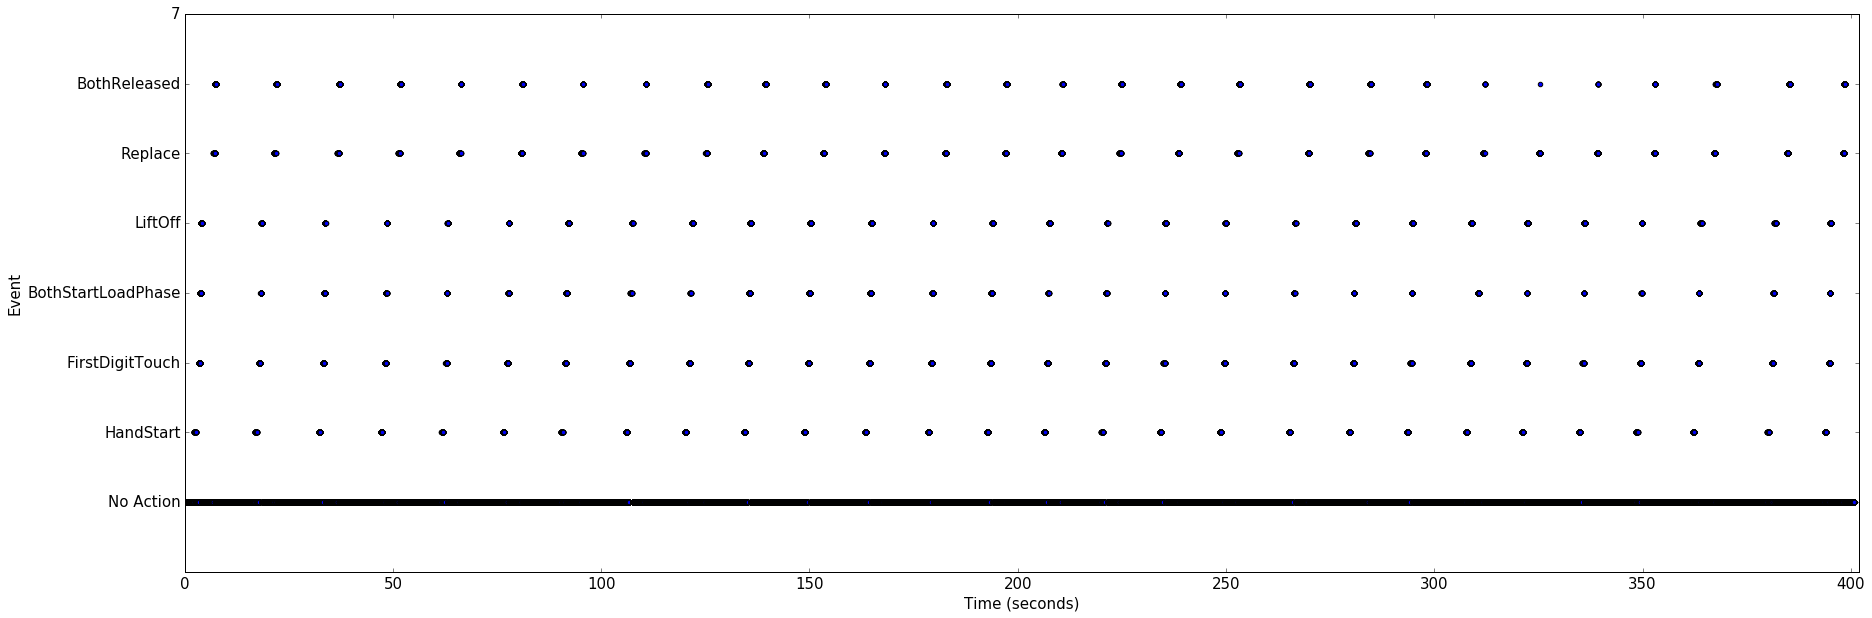

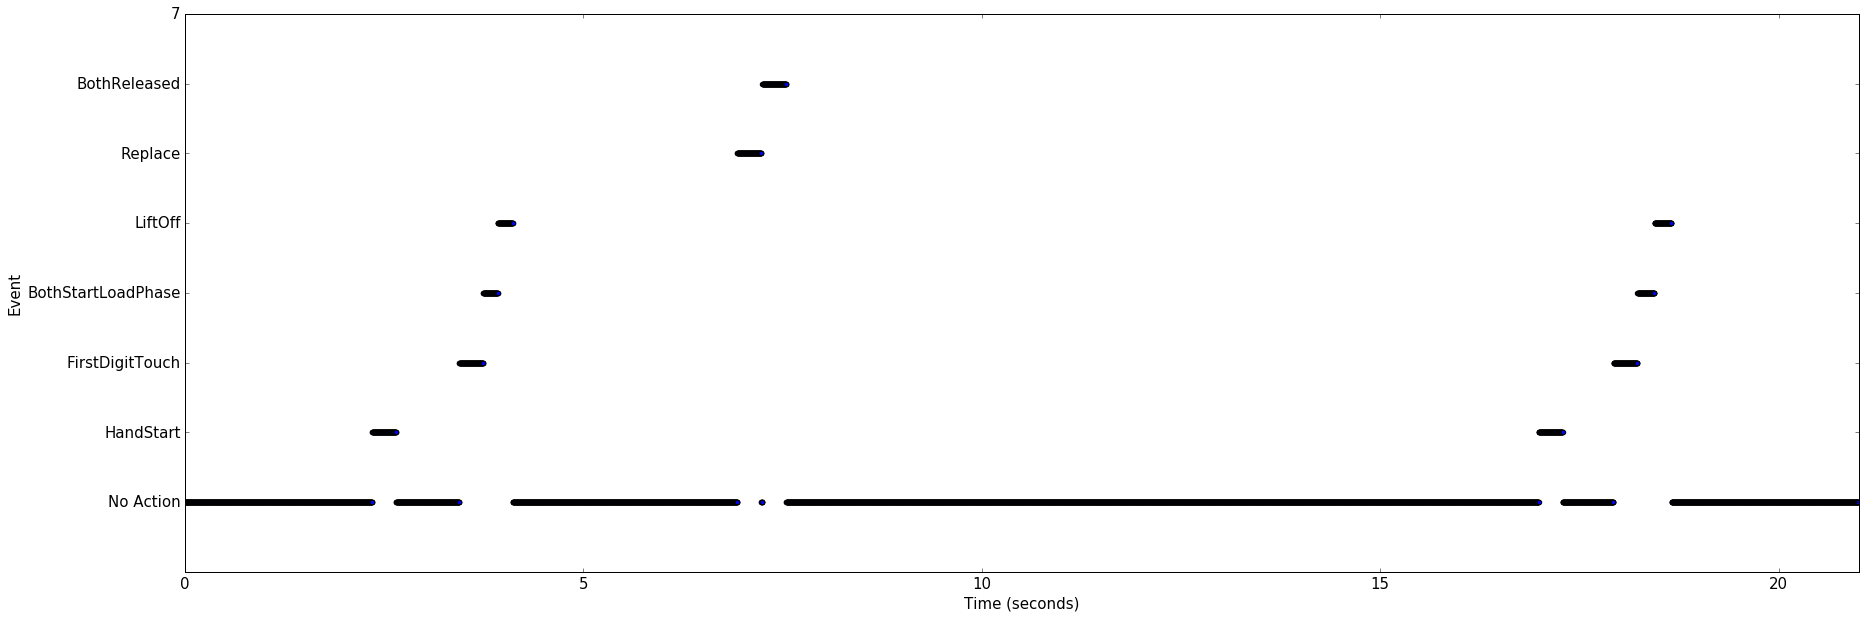

In [8]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


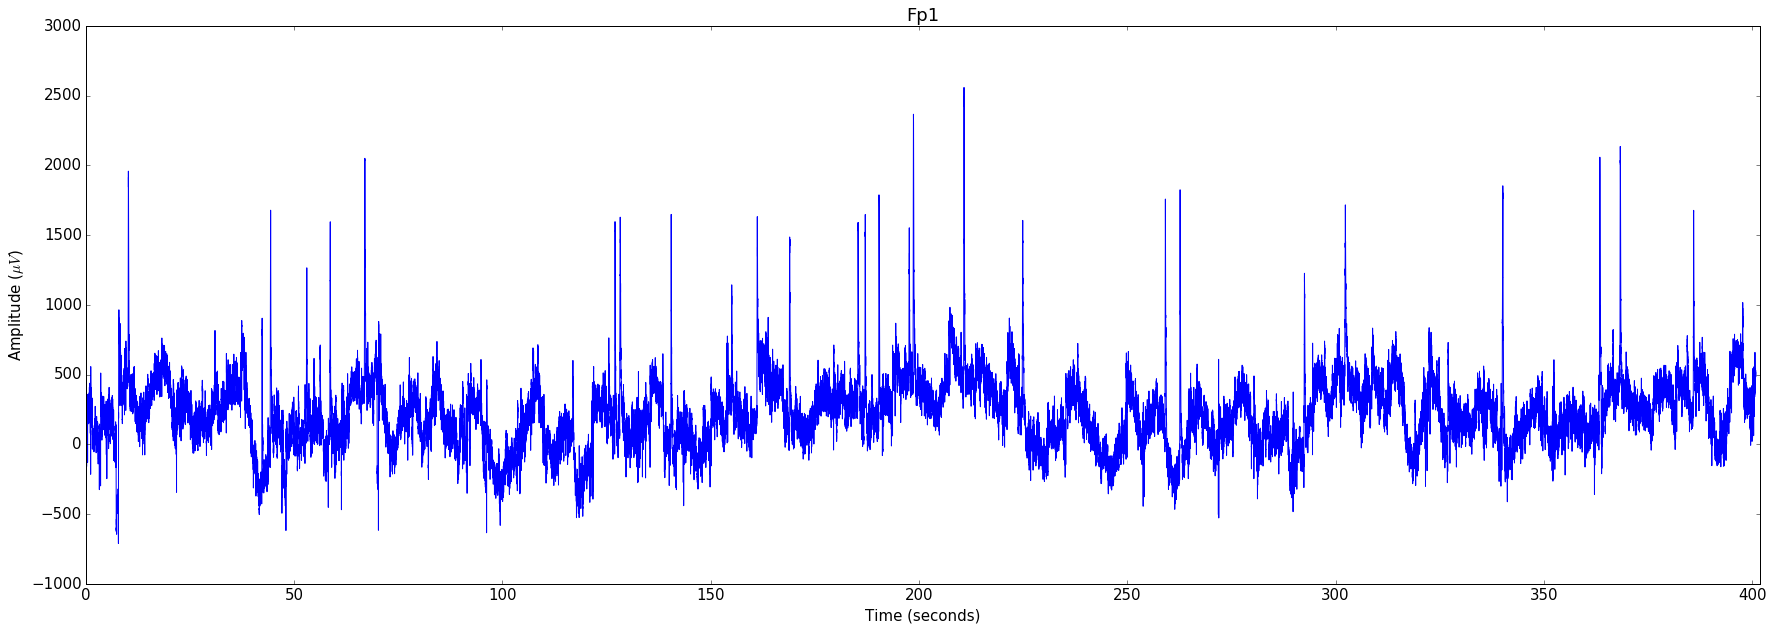

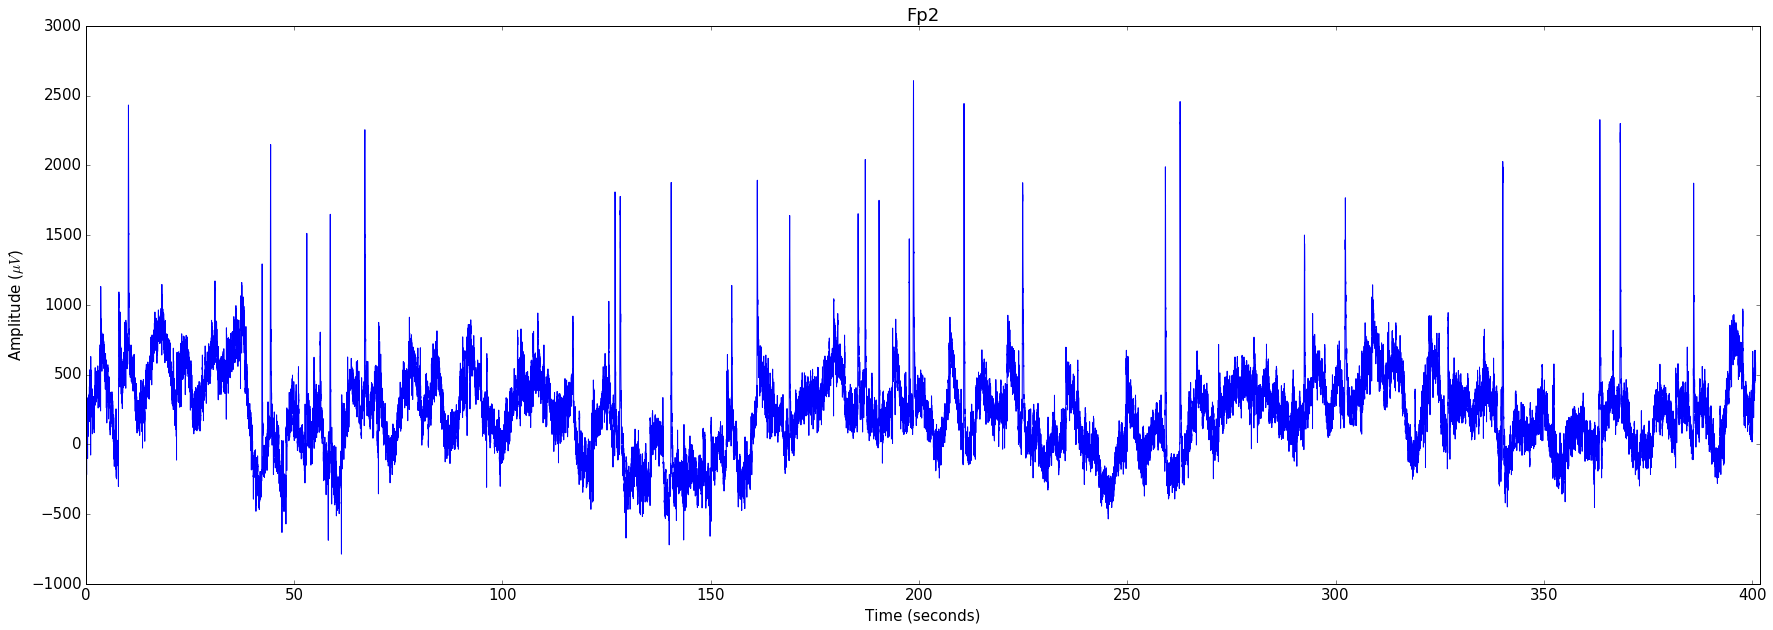

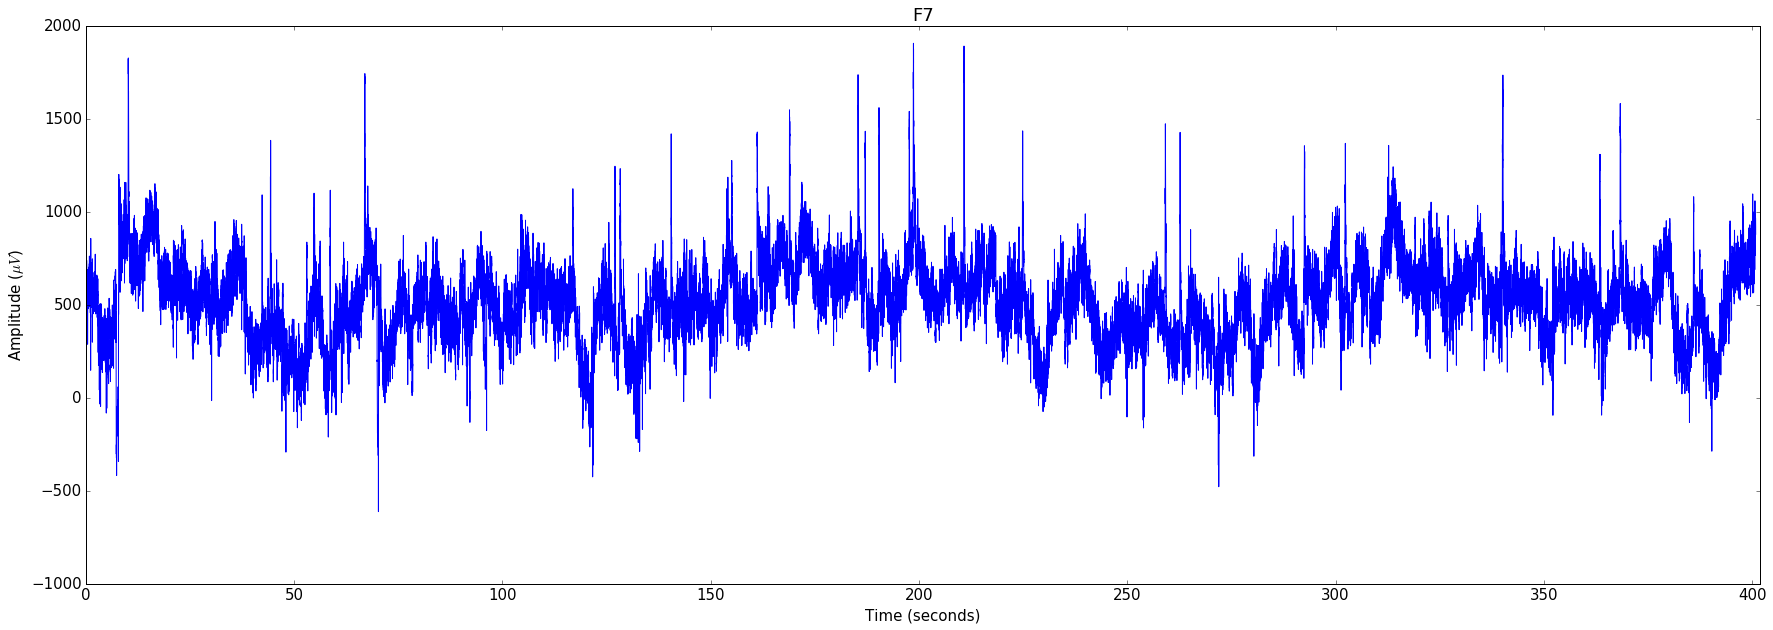

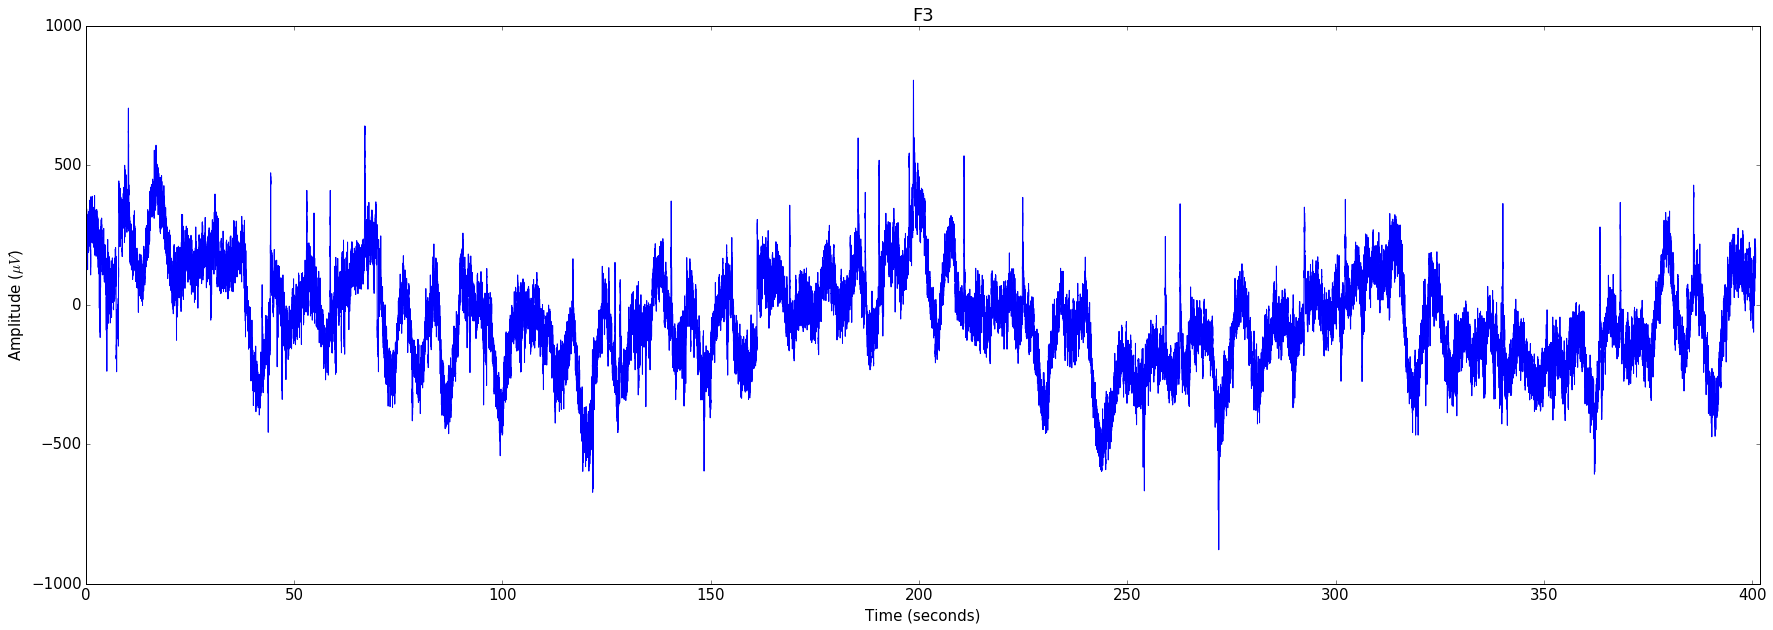

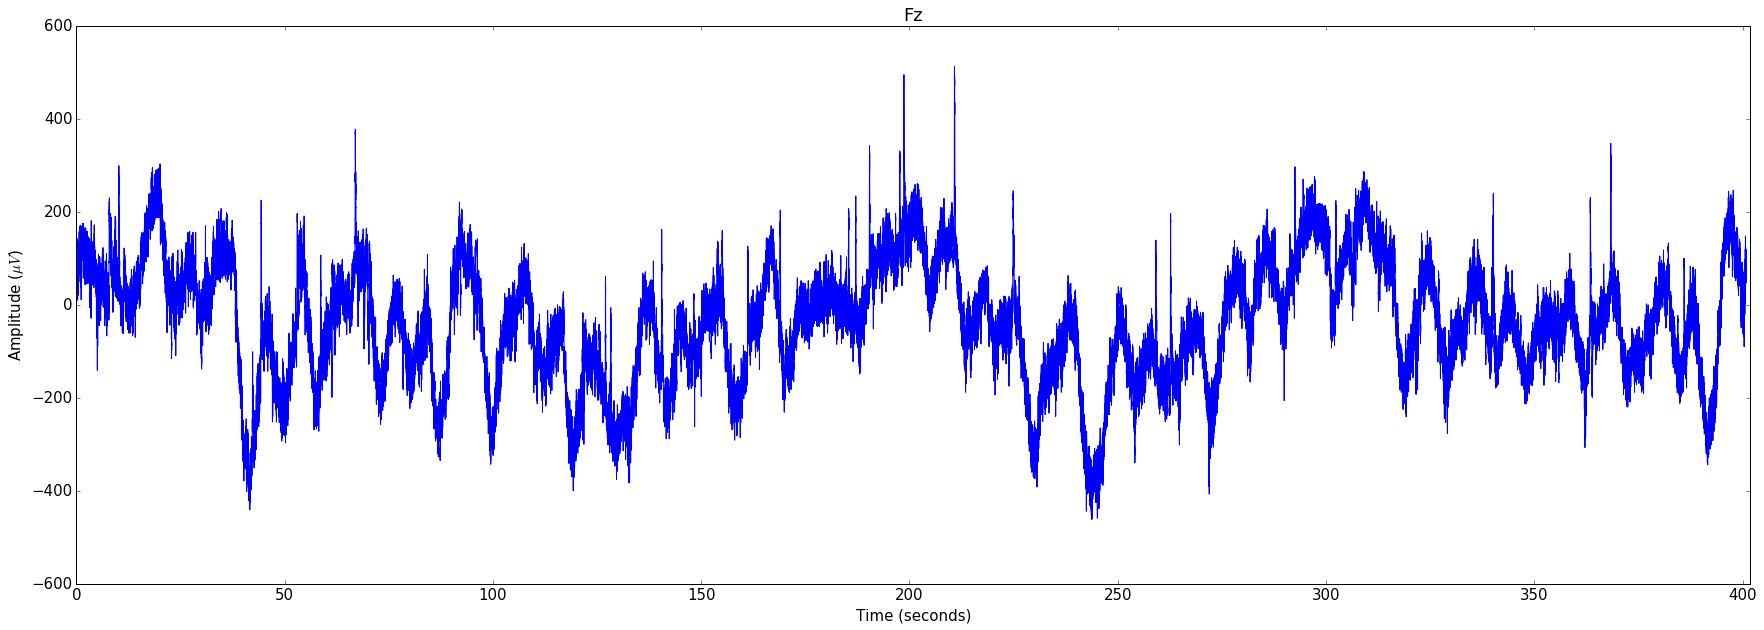

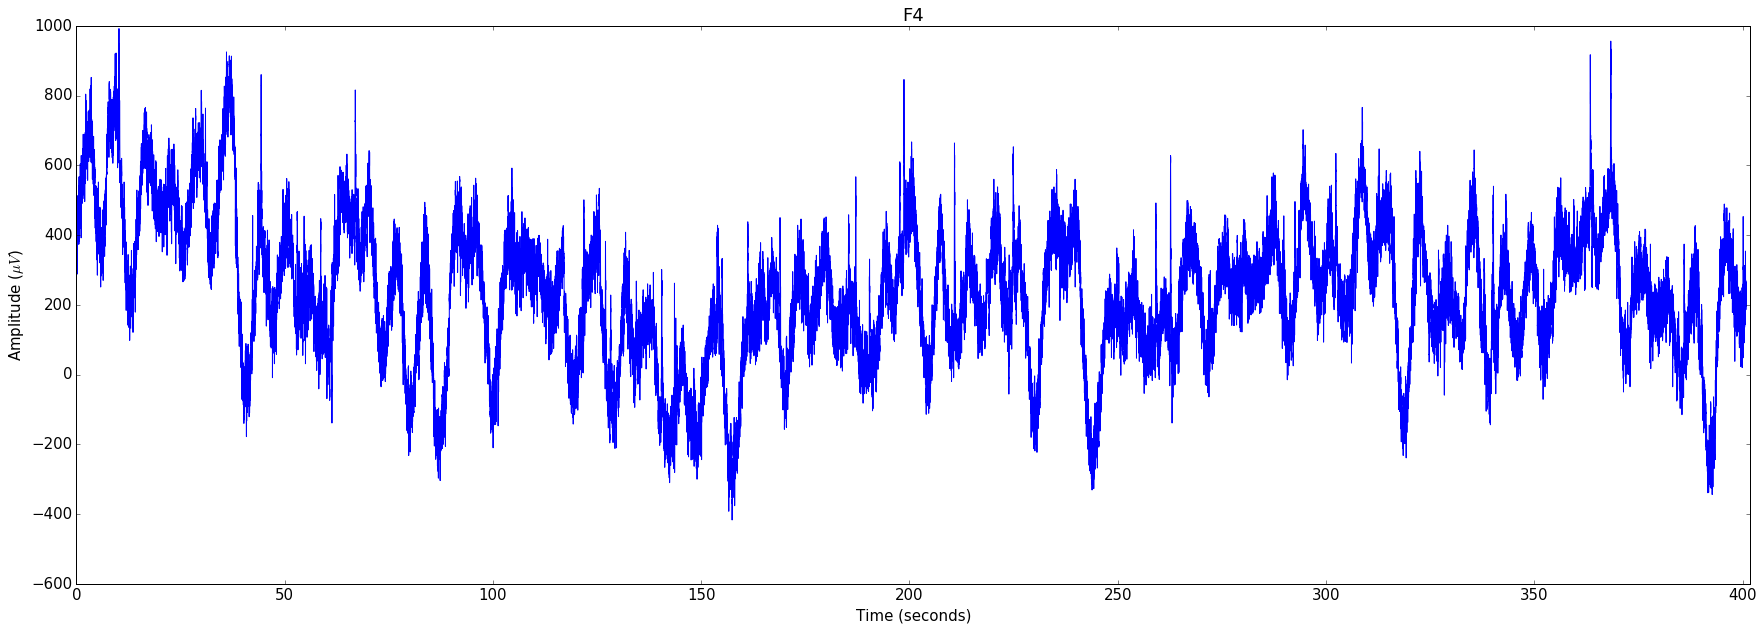

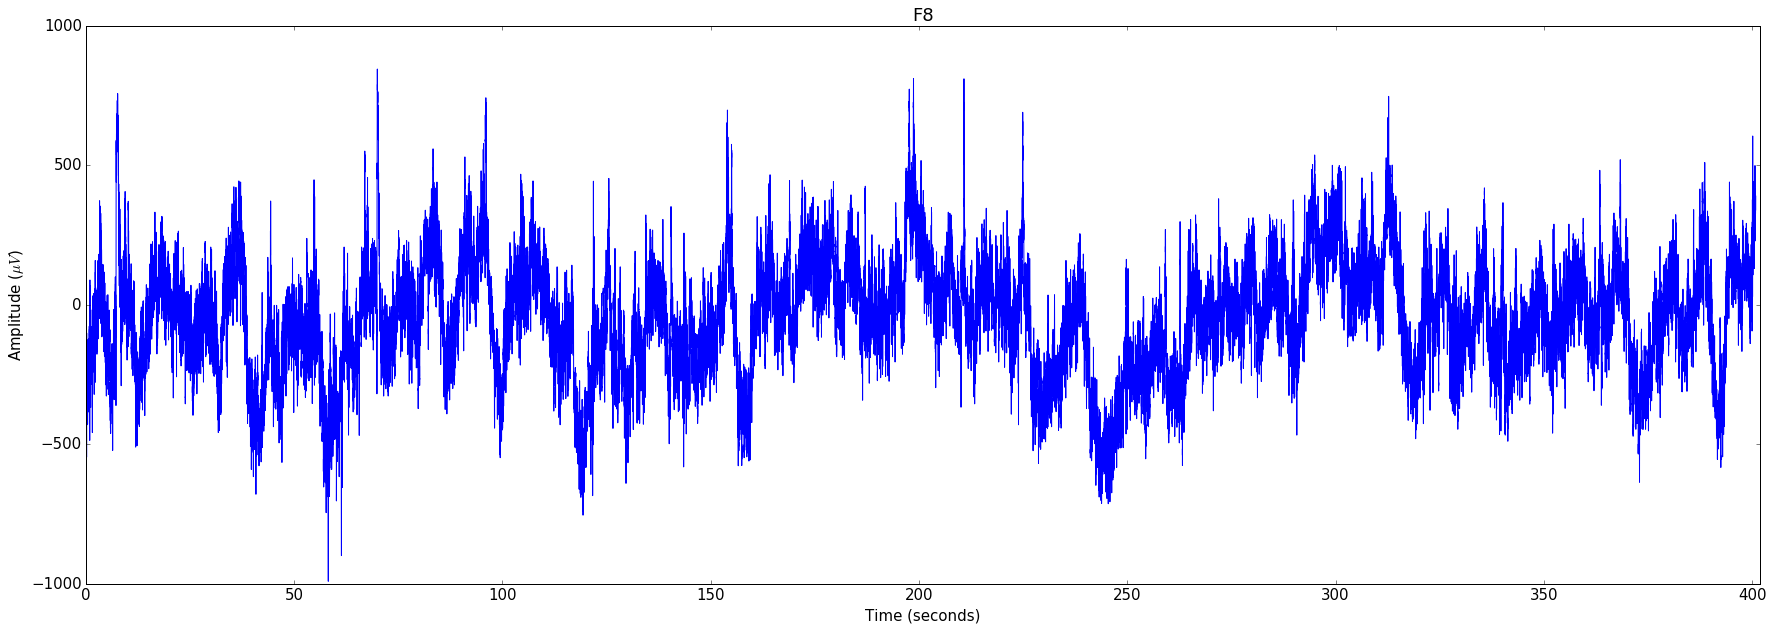

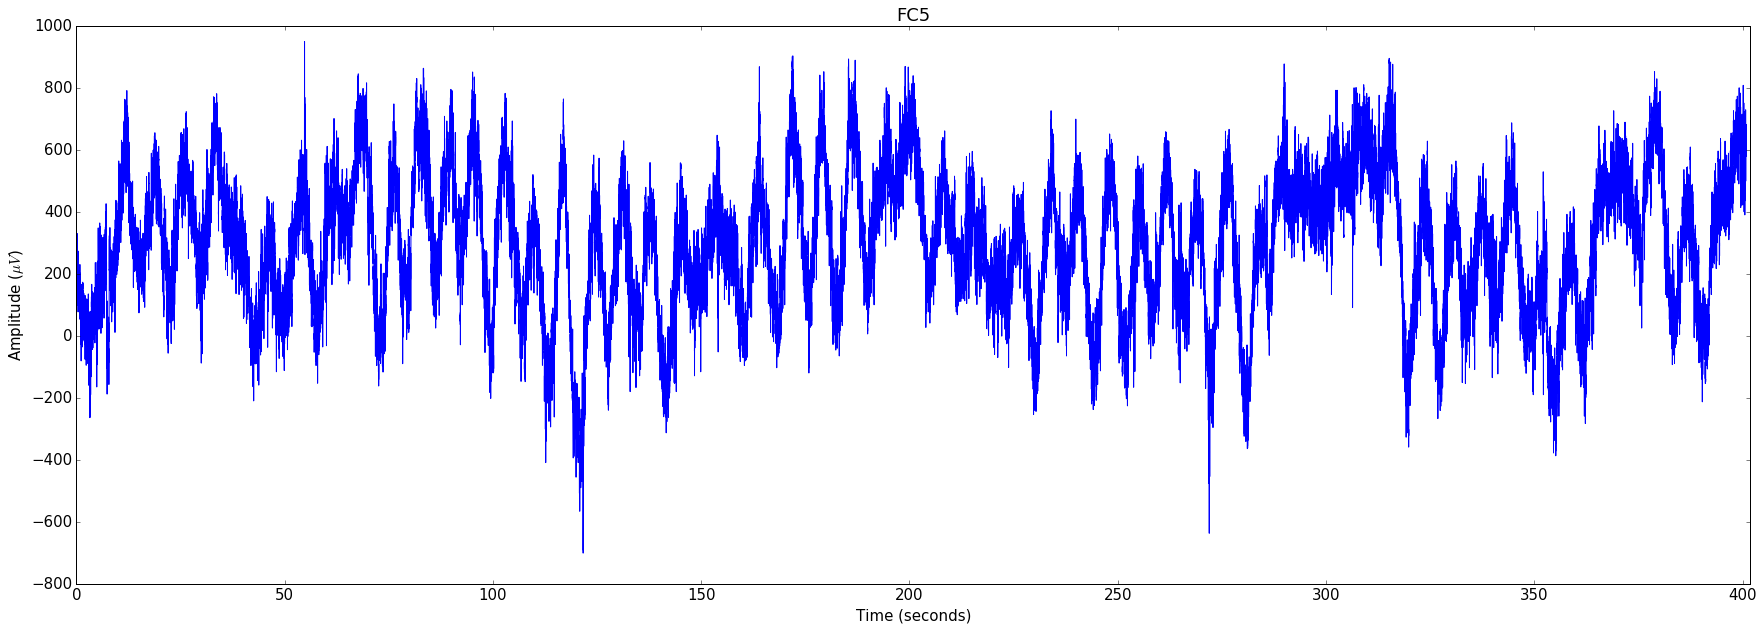

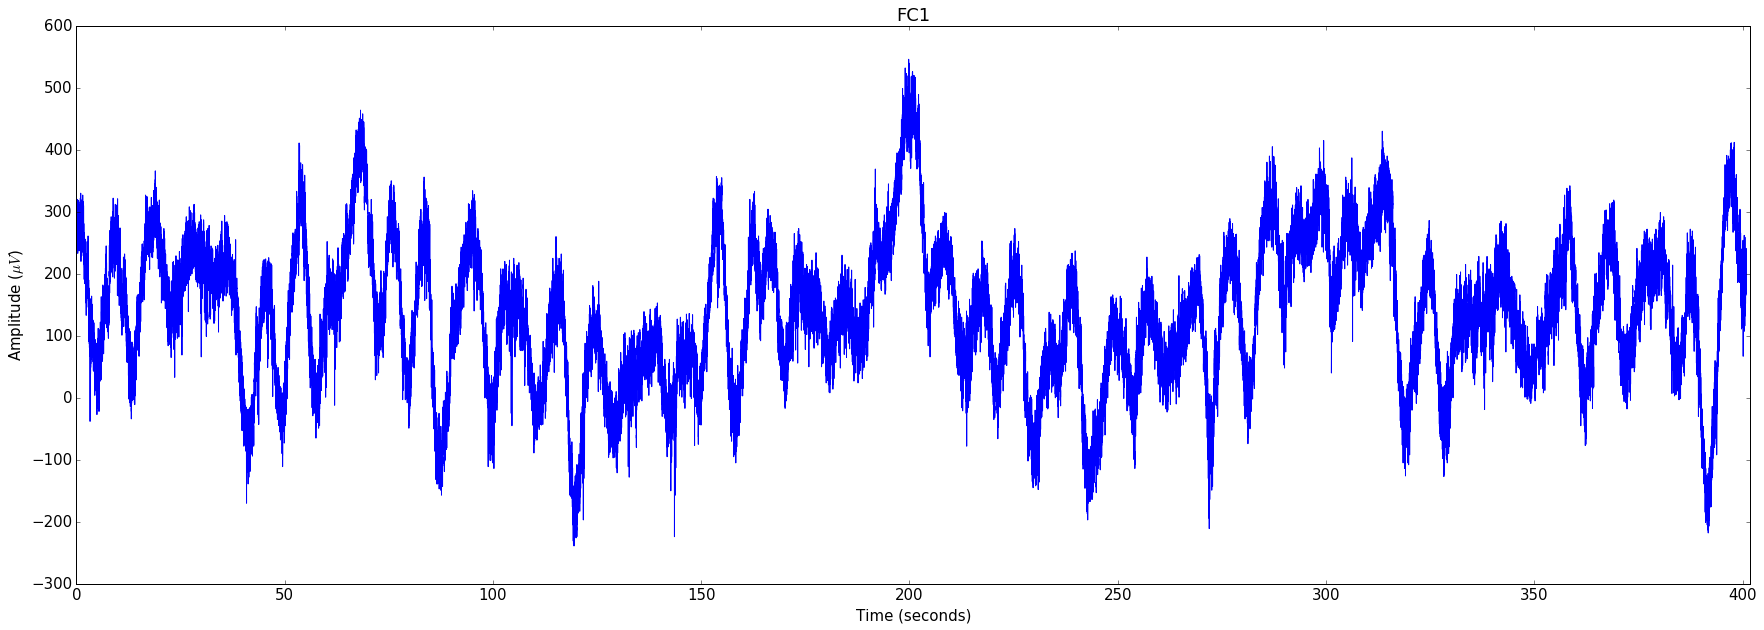

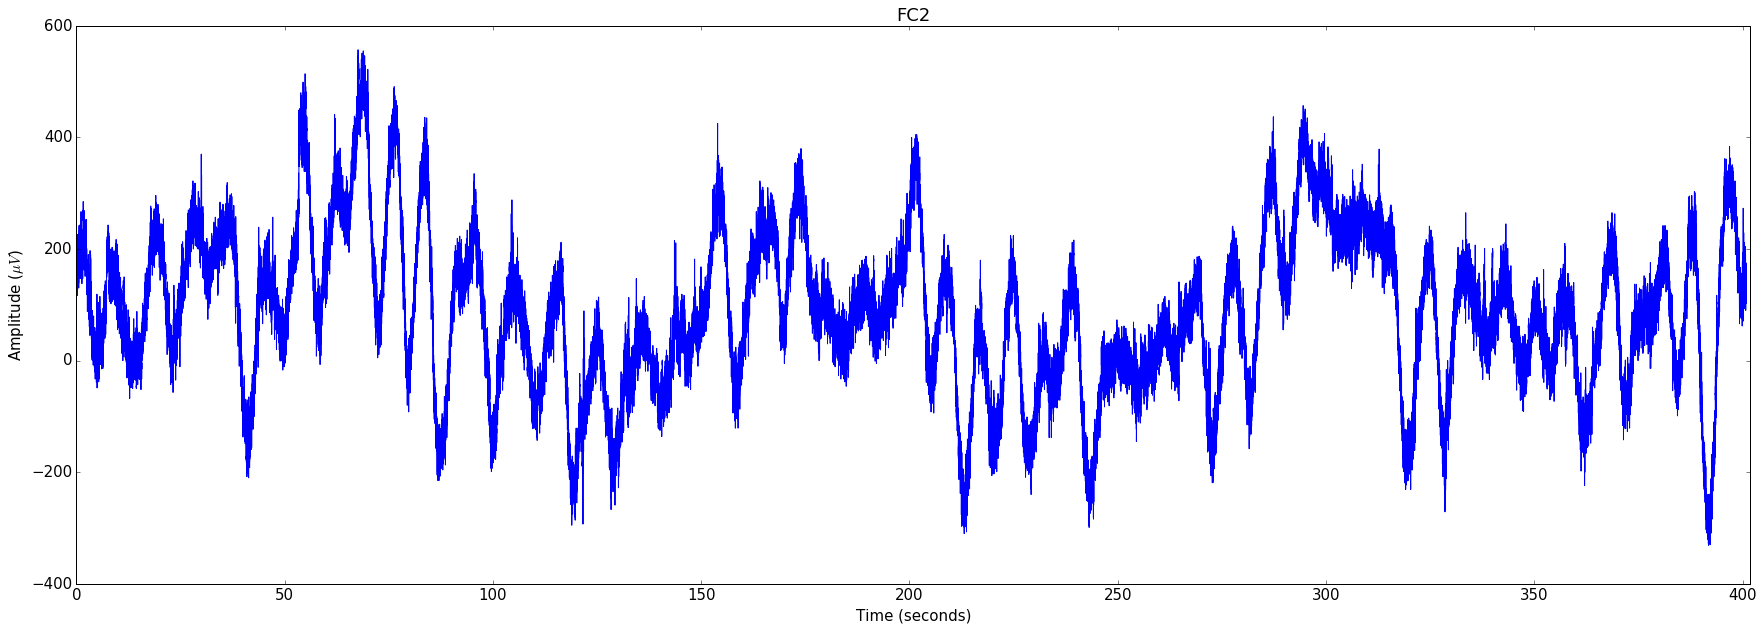

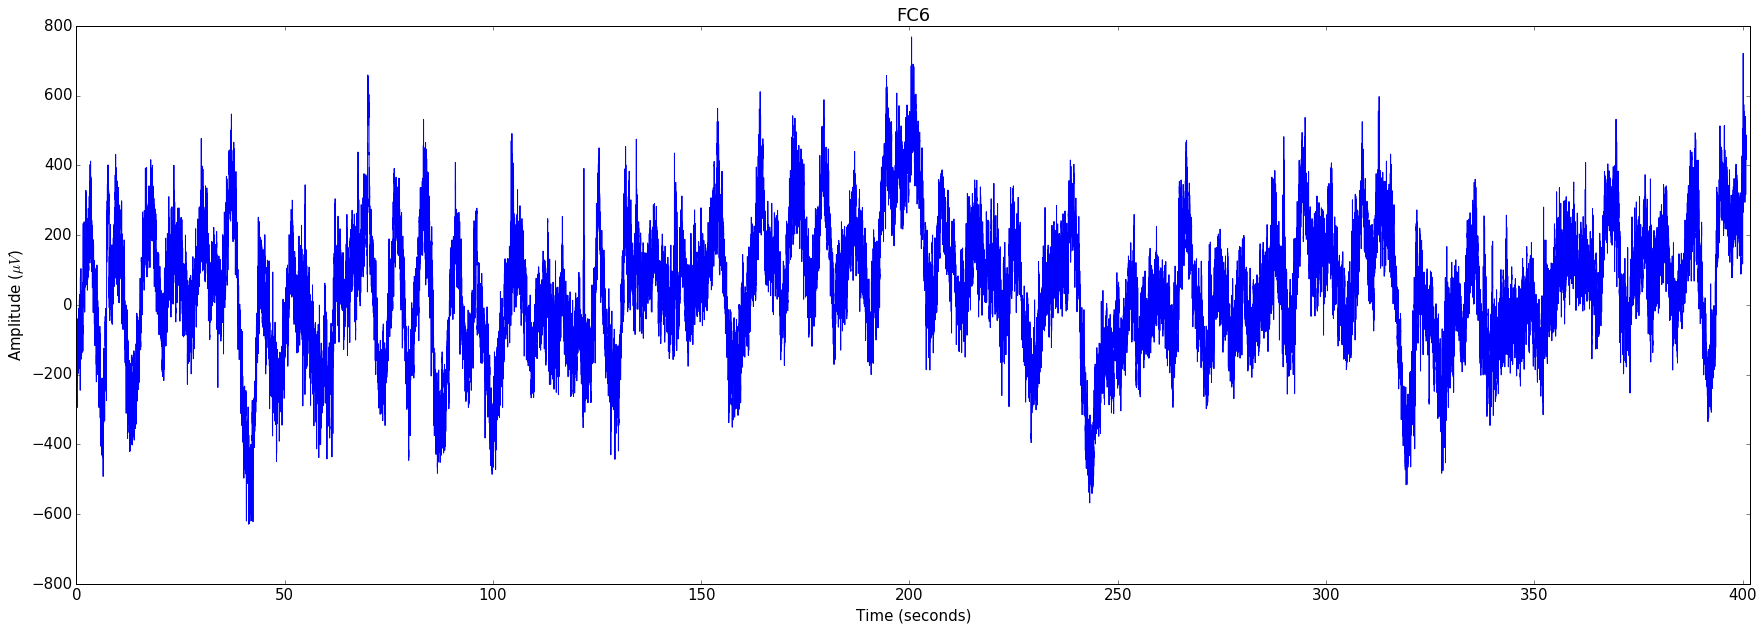

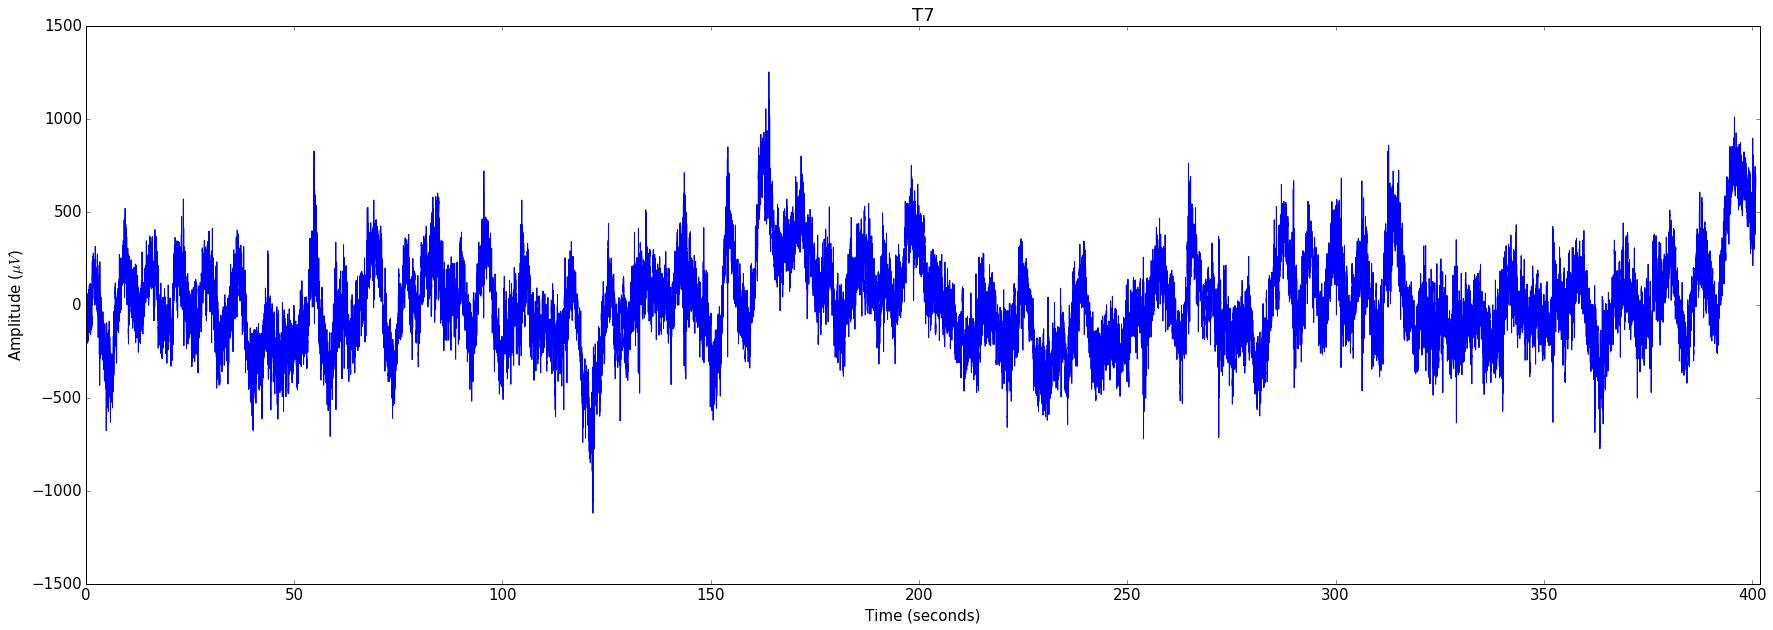

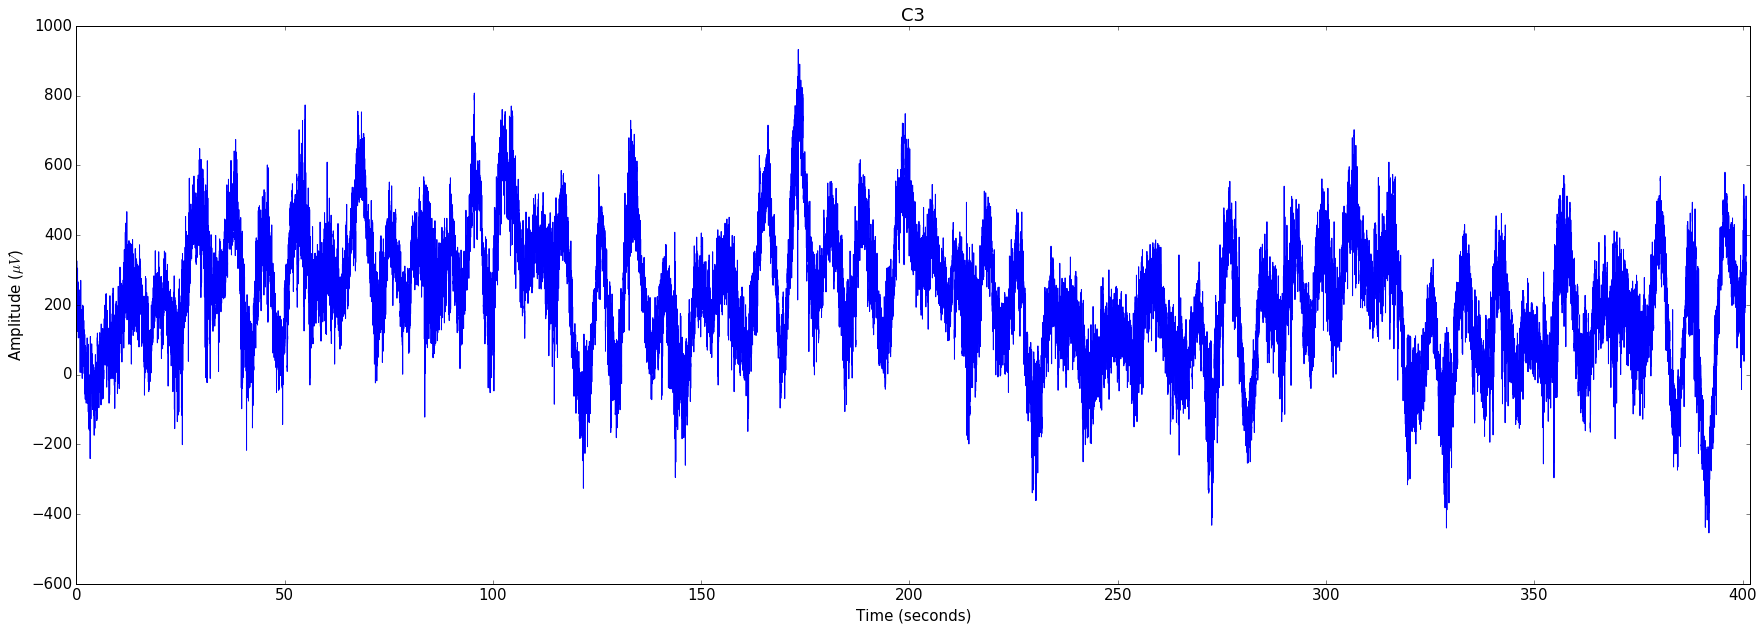

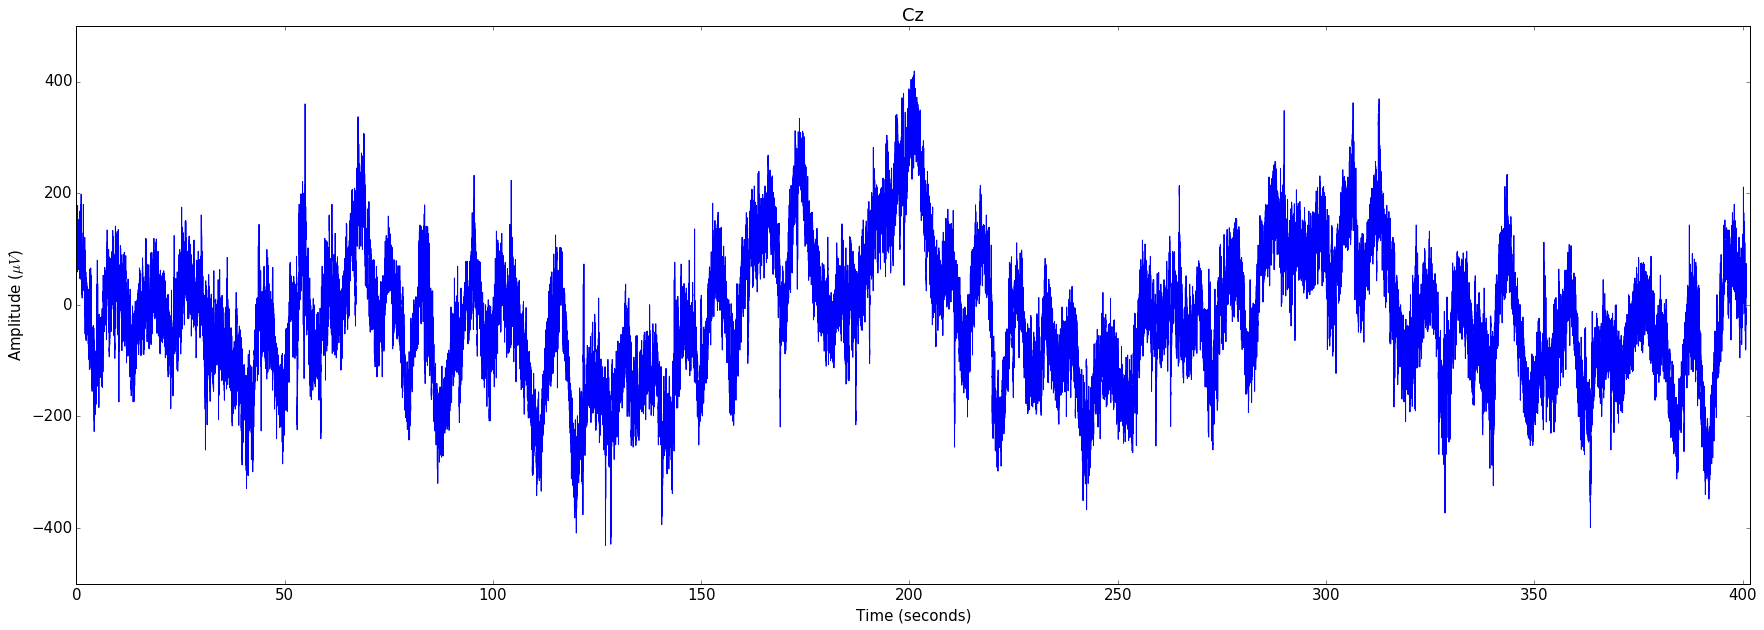

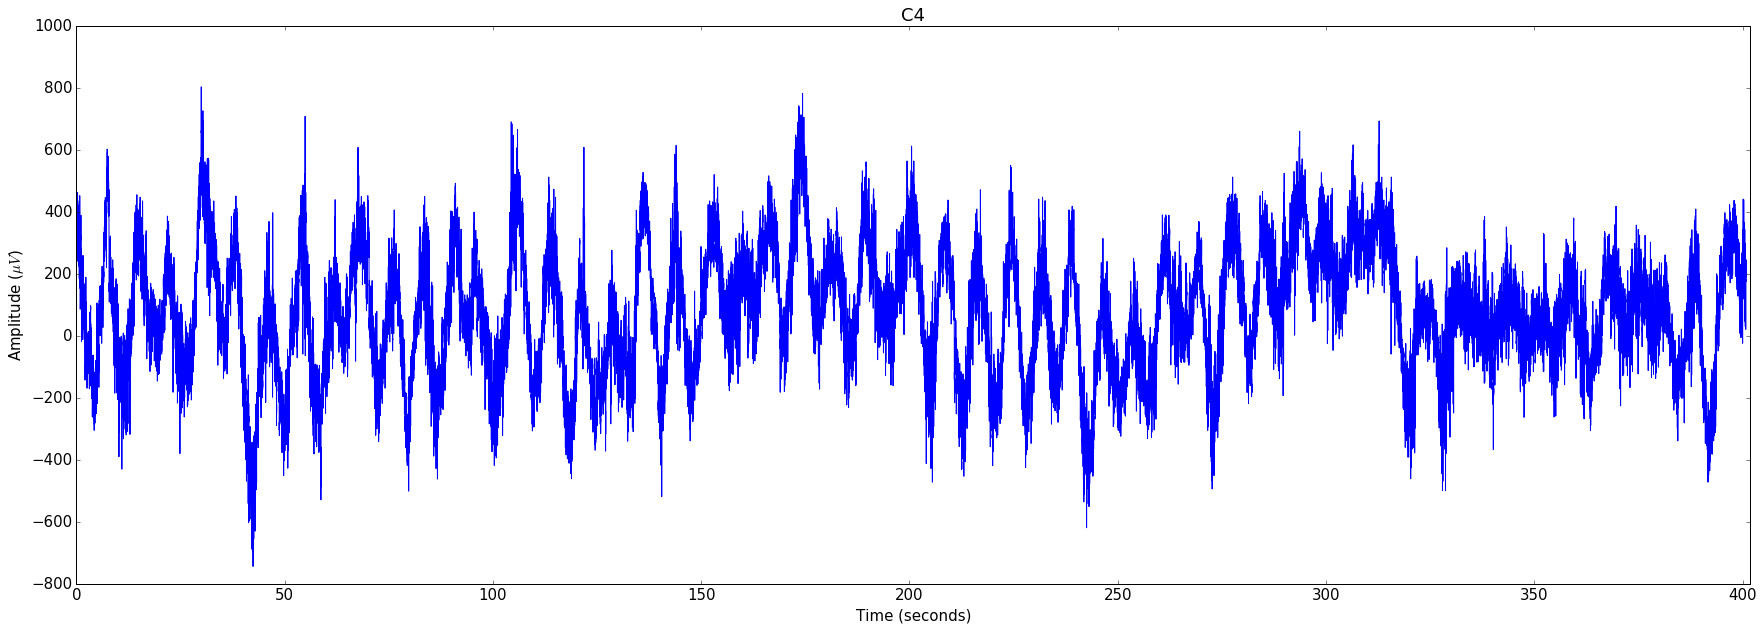

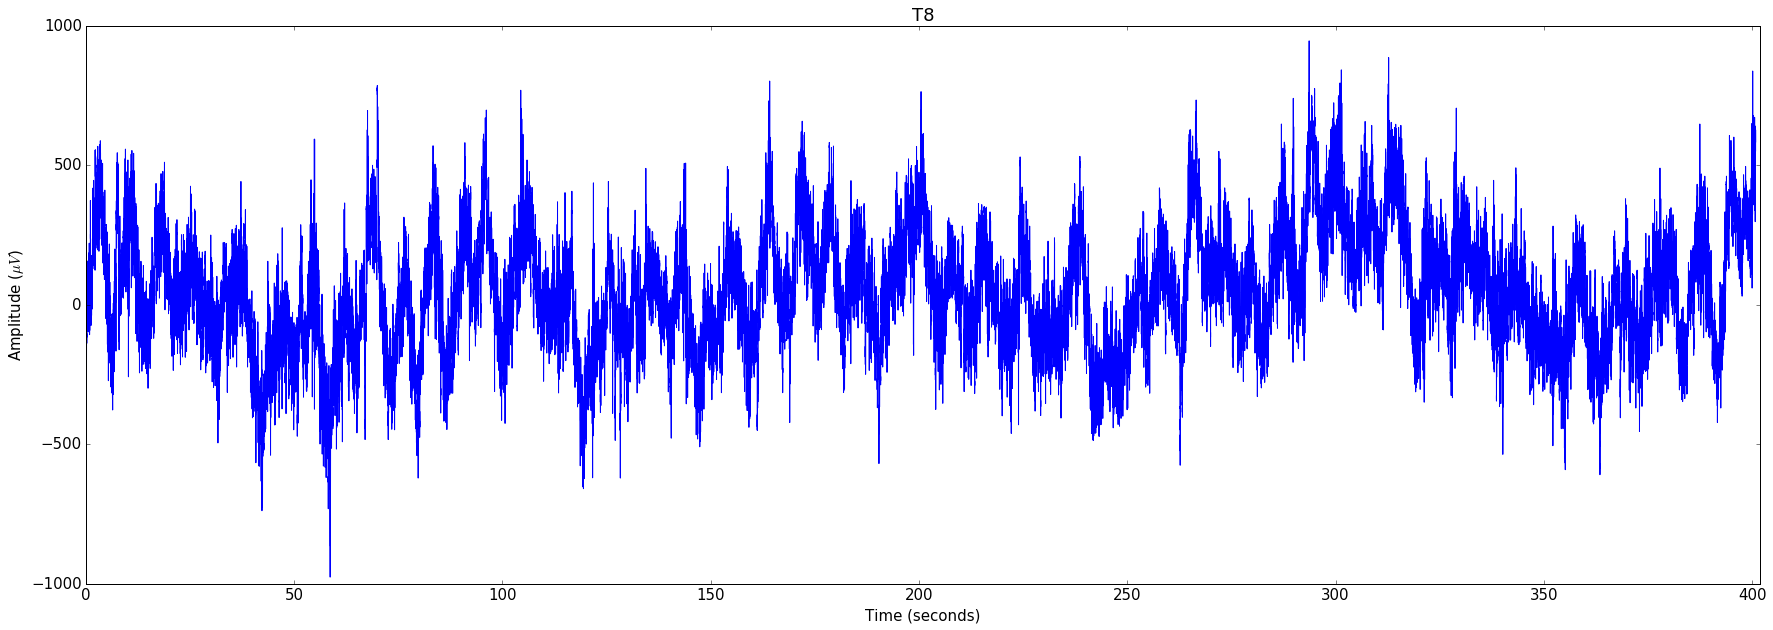

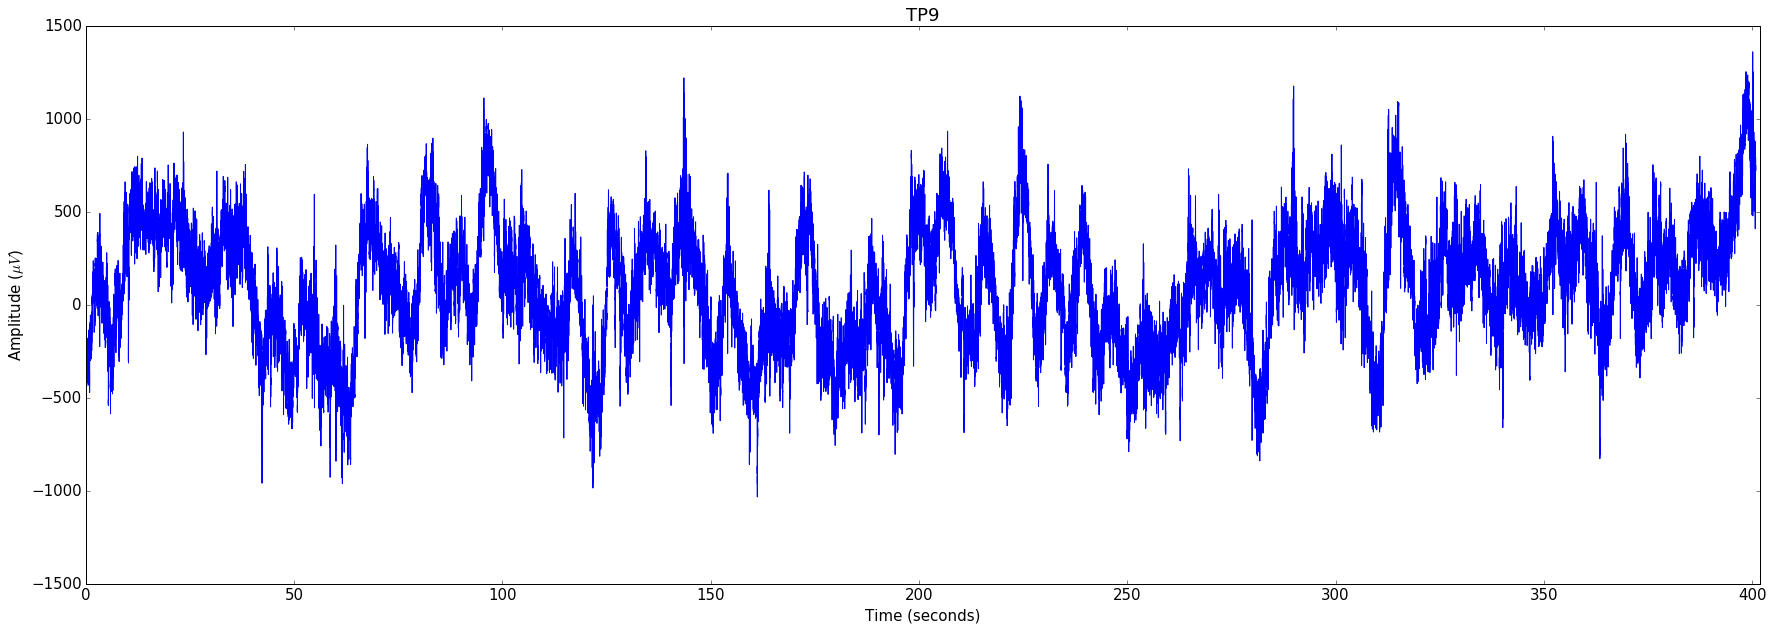

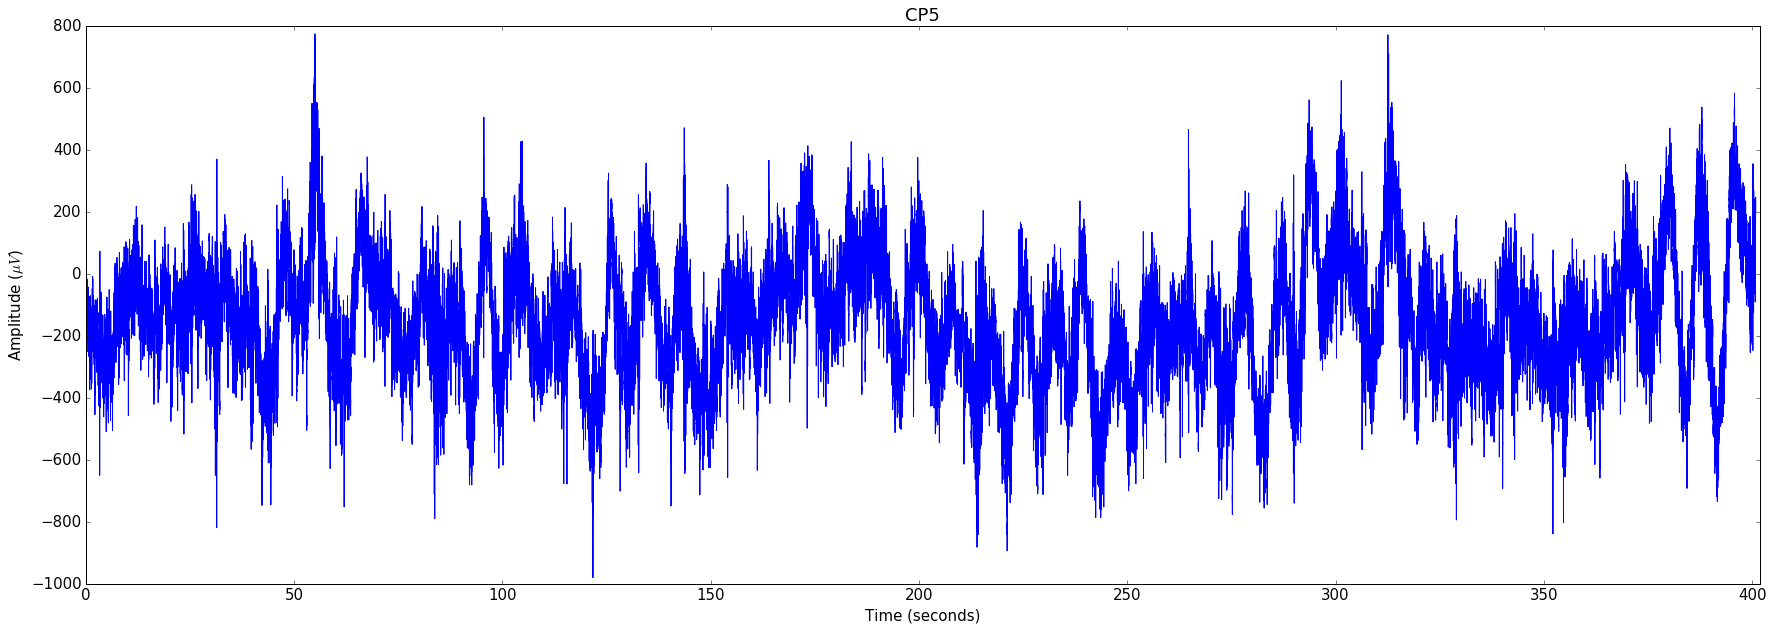

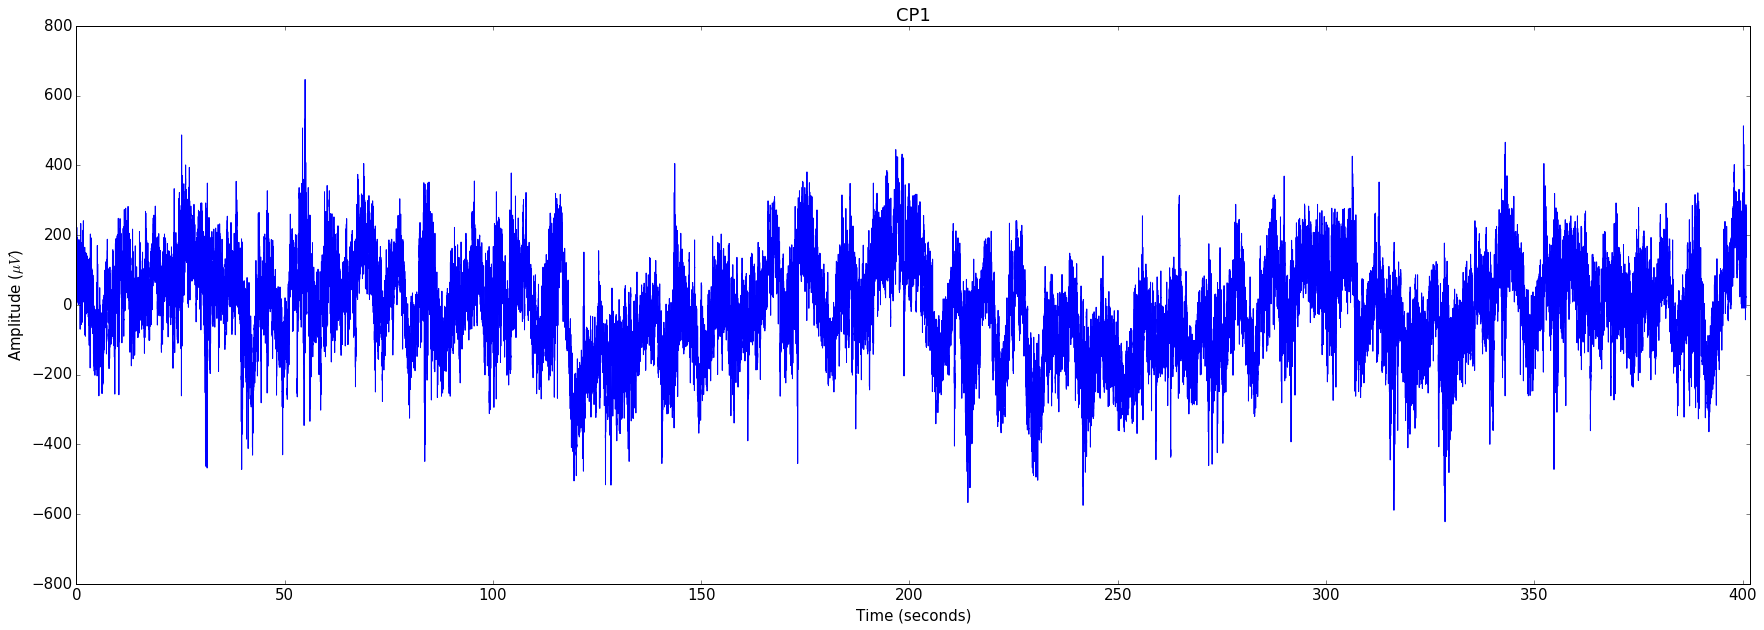

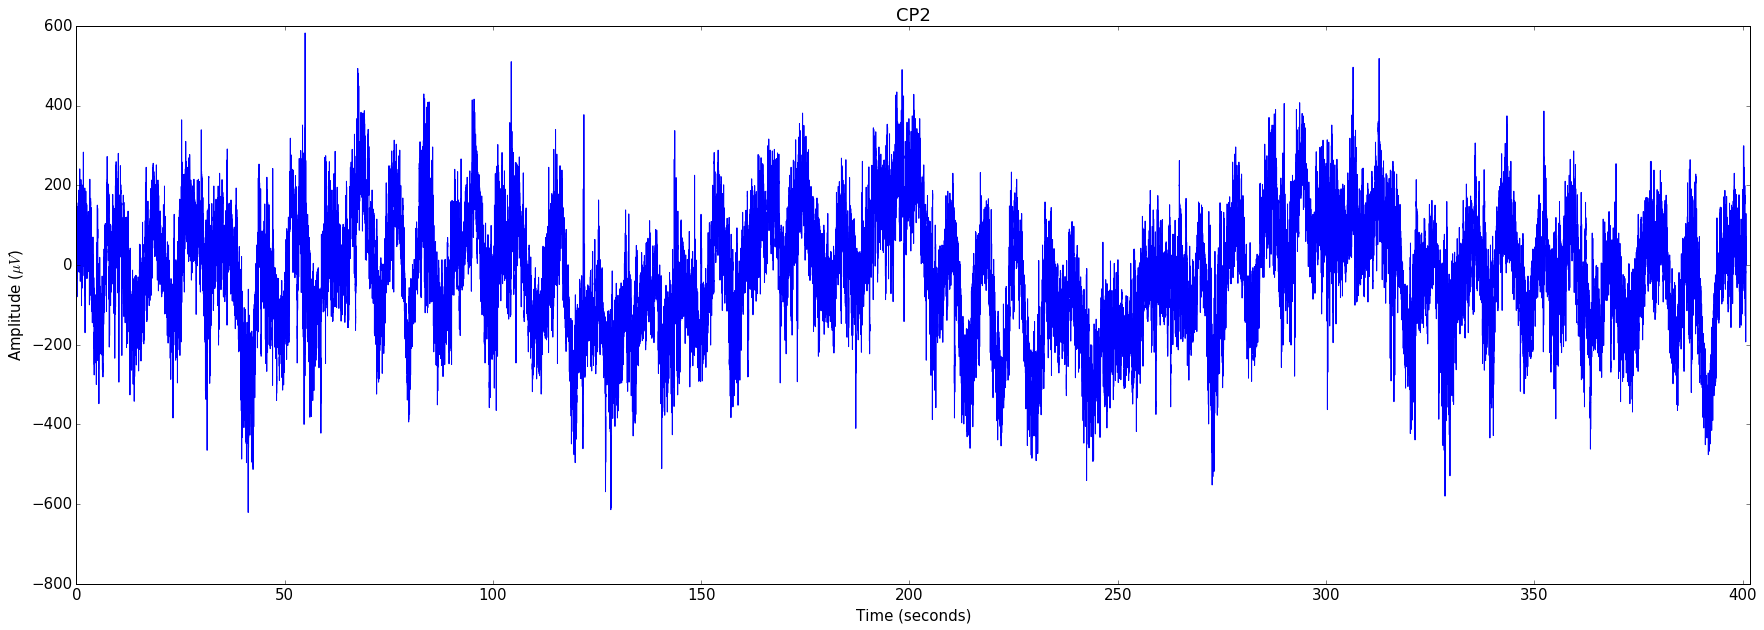

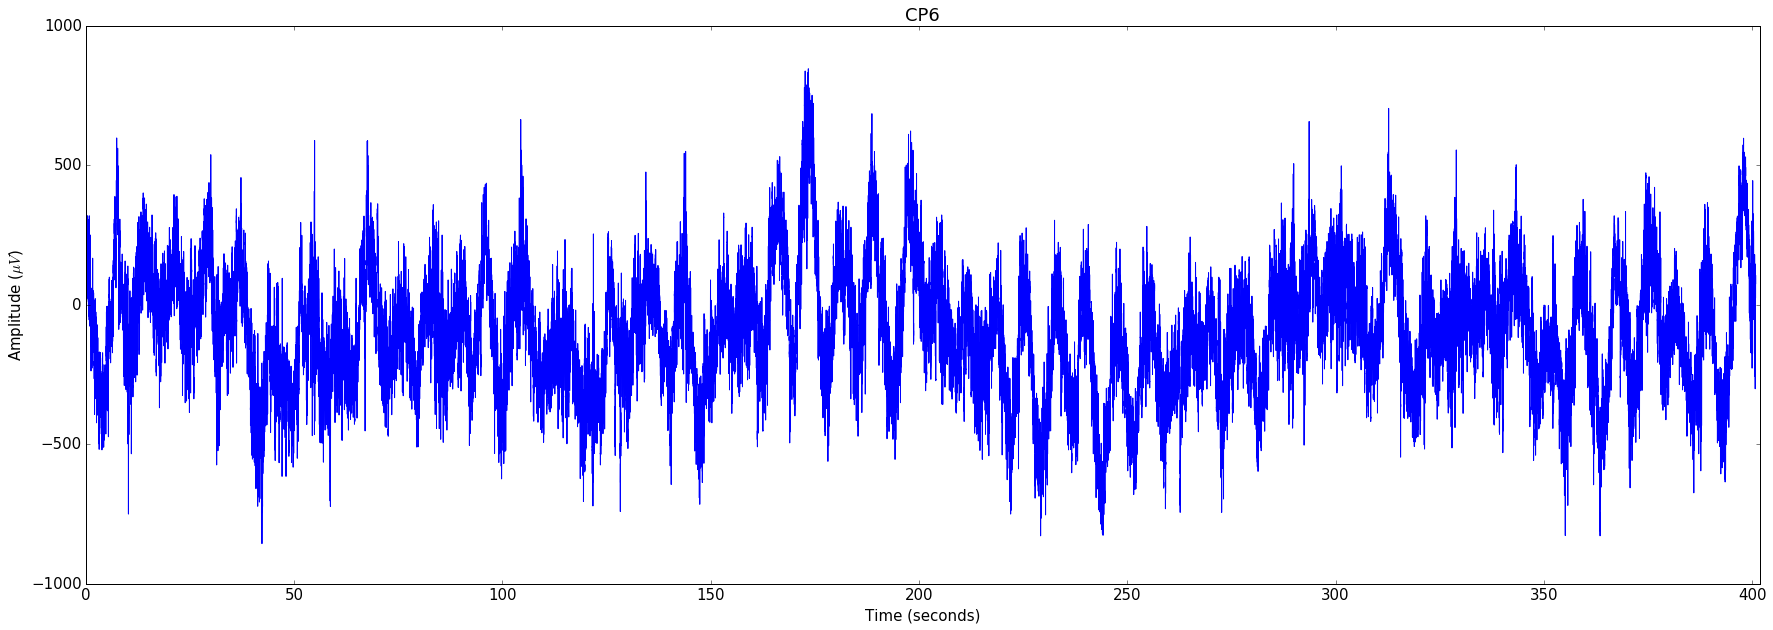

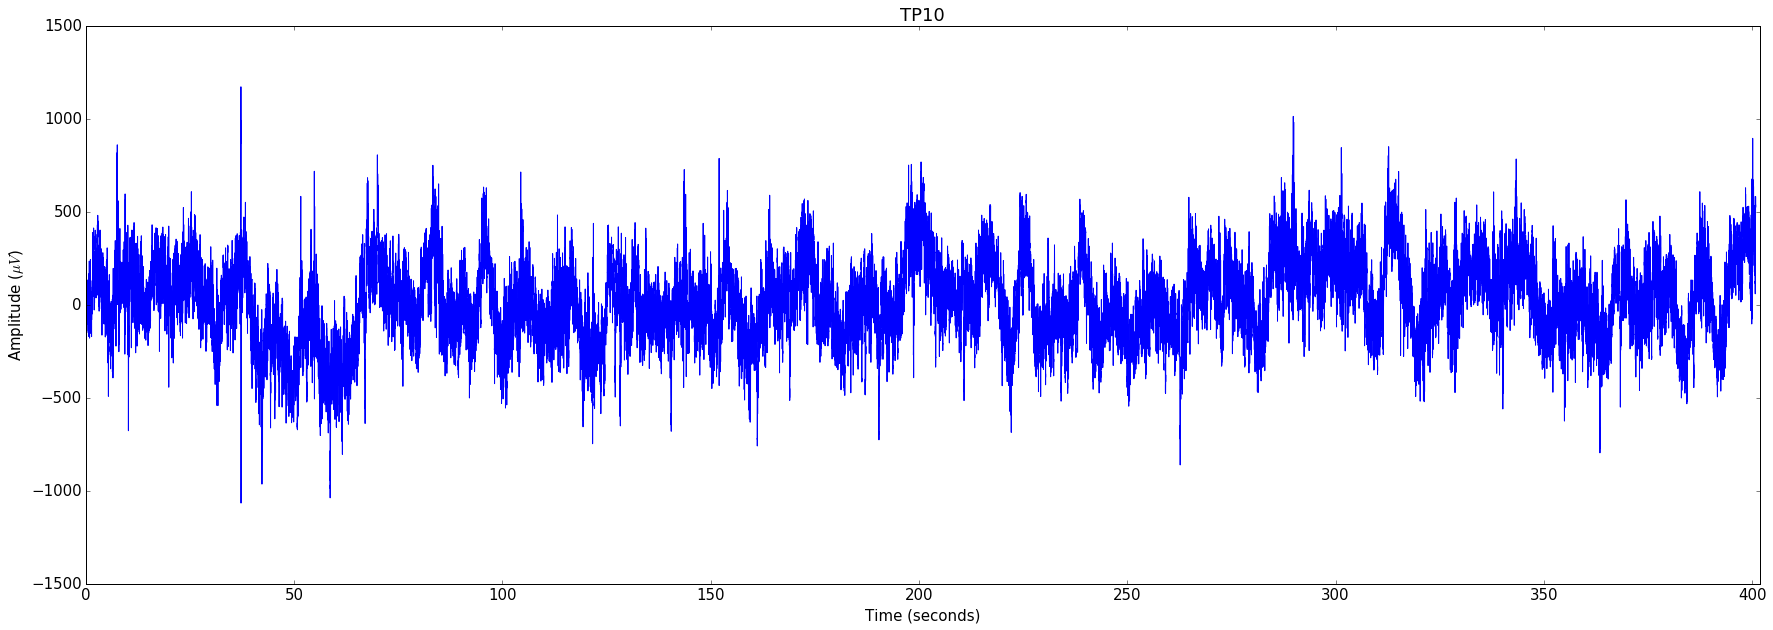

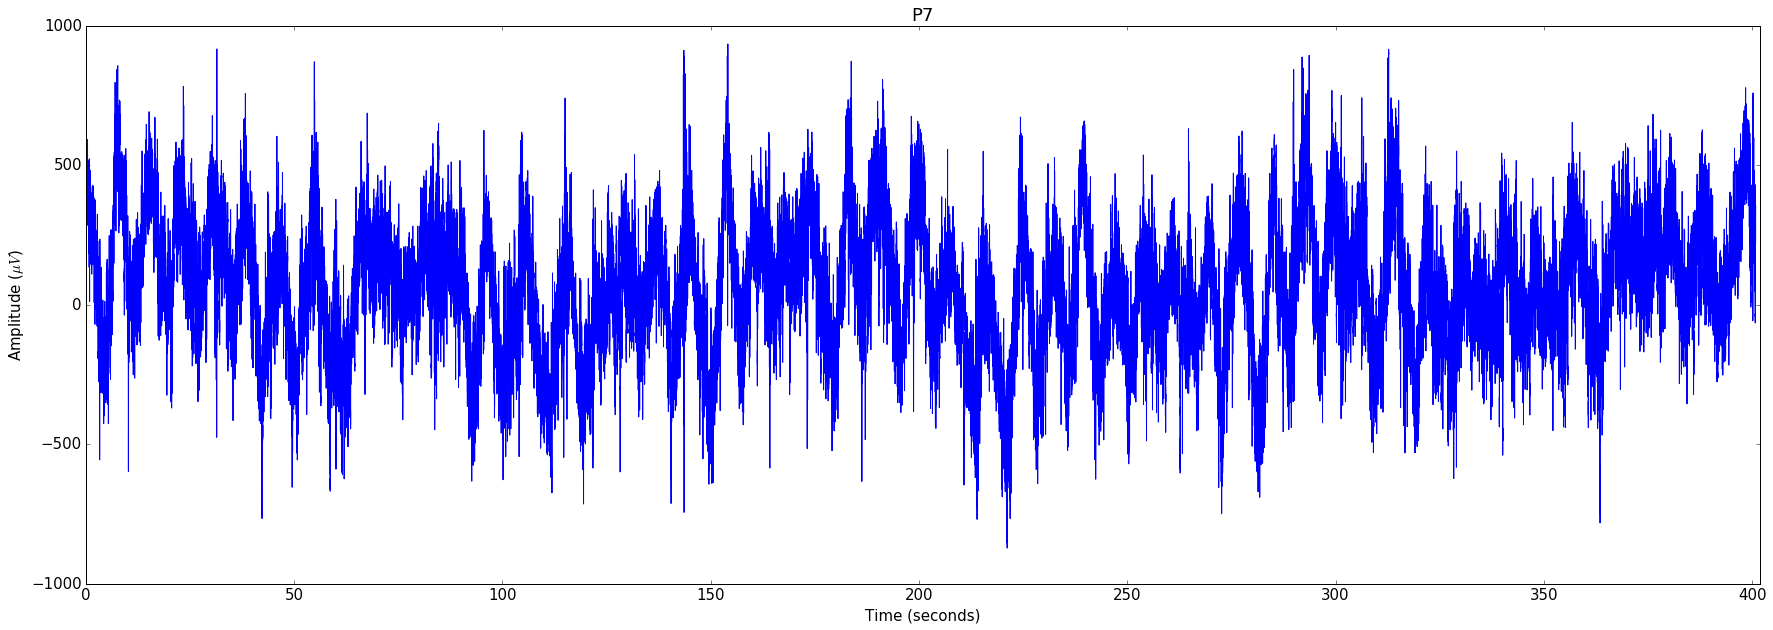

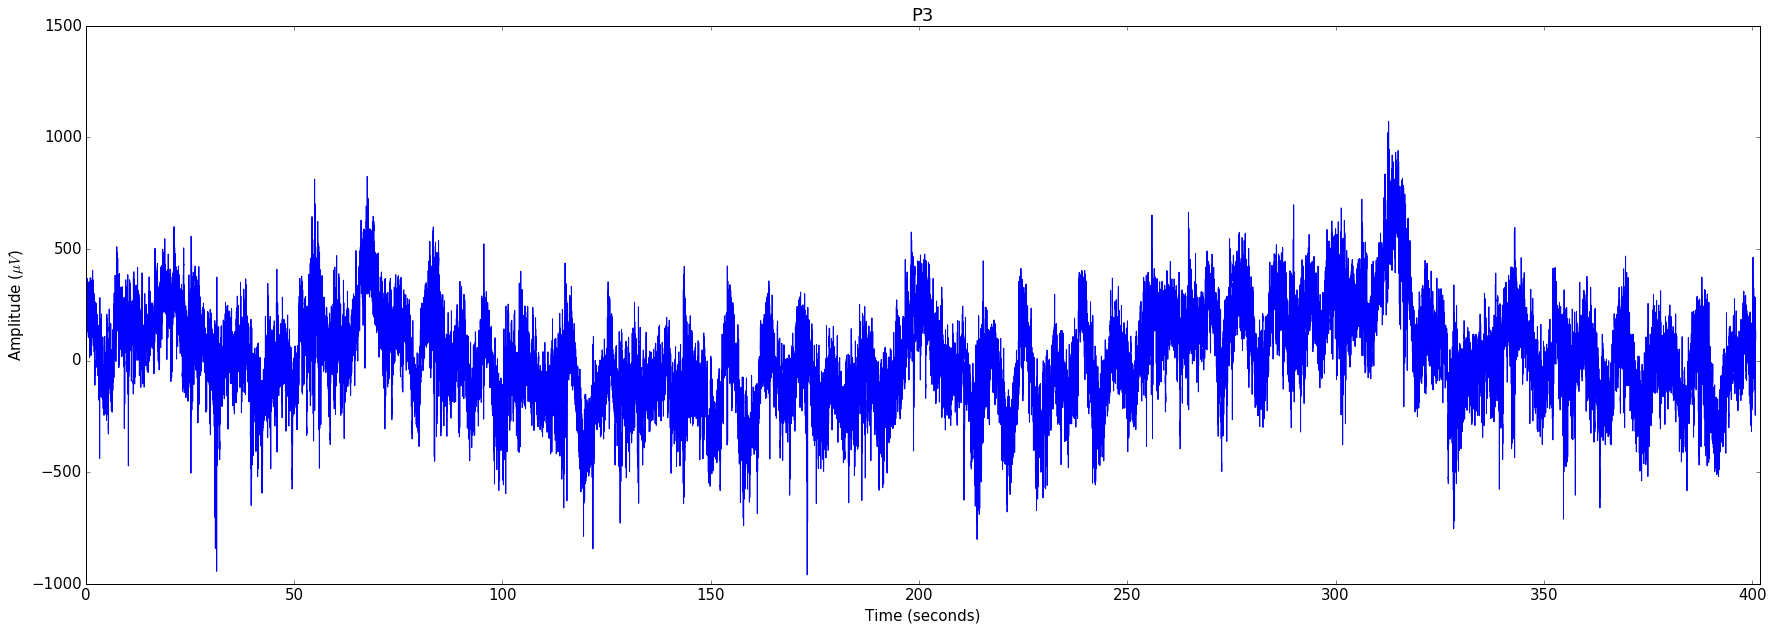

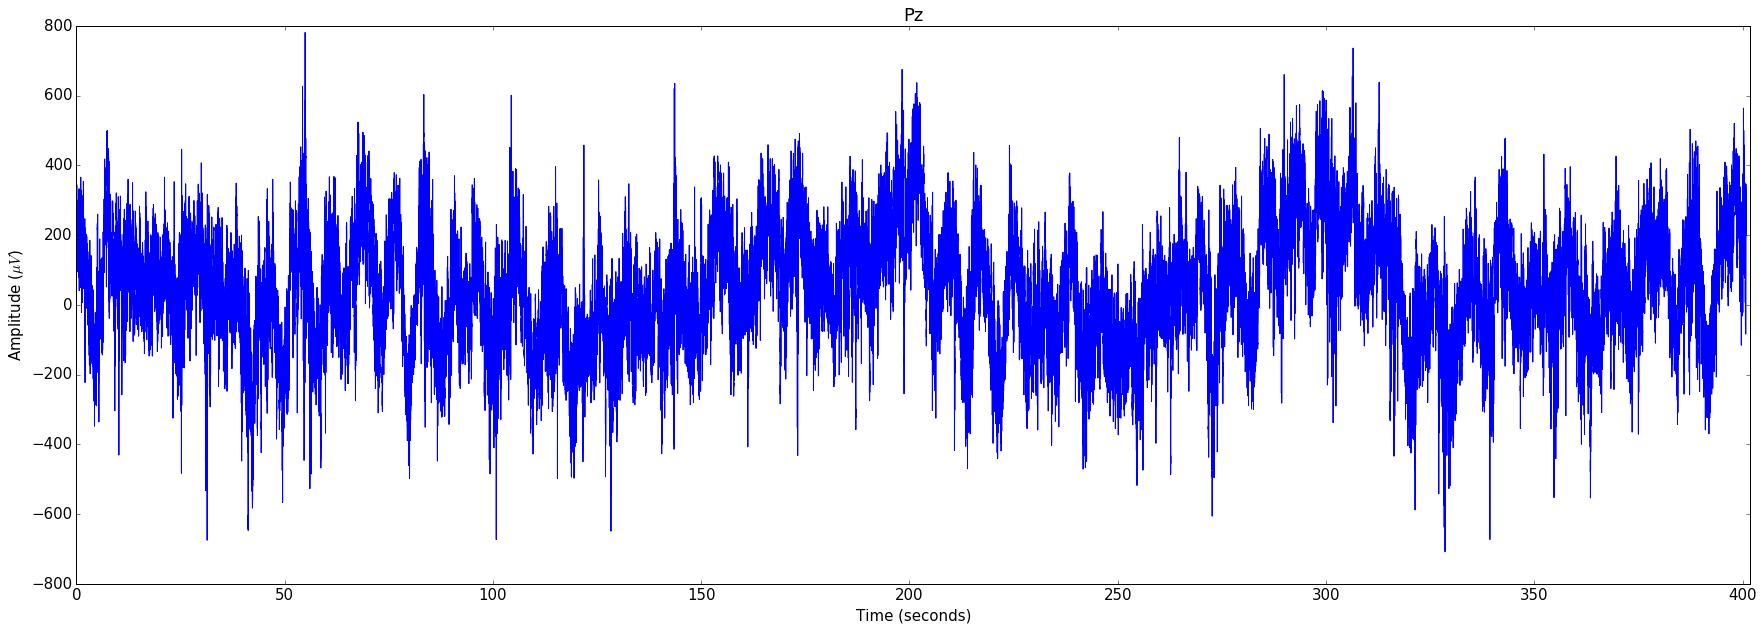

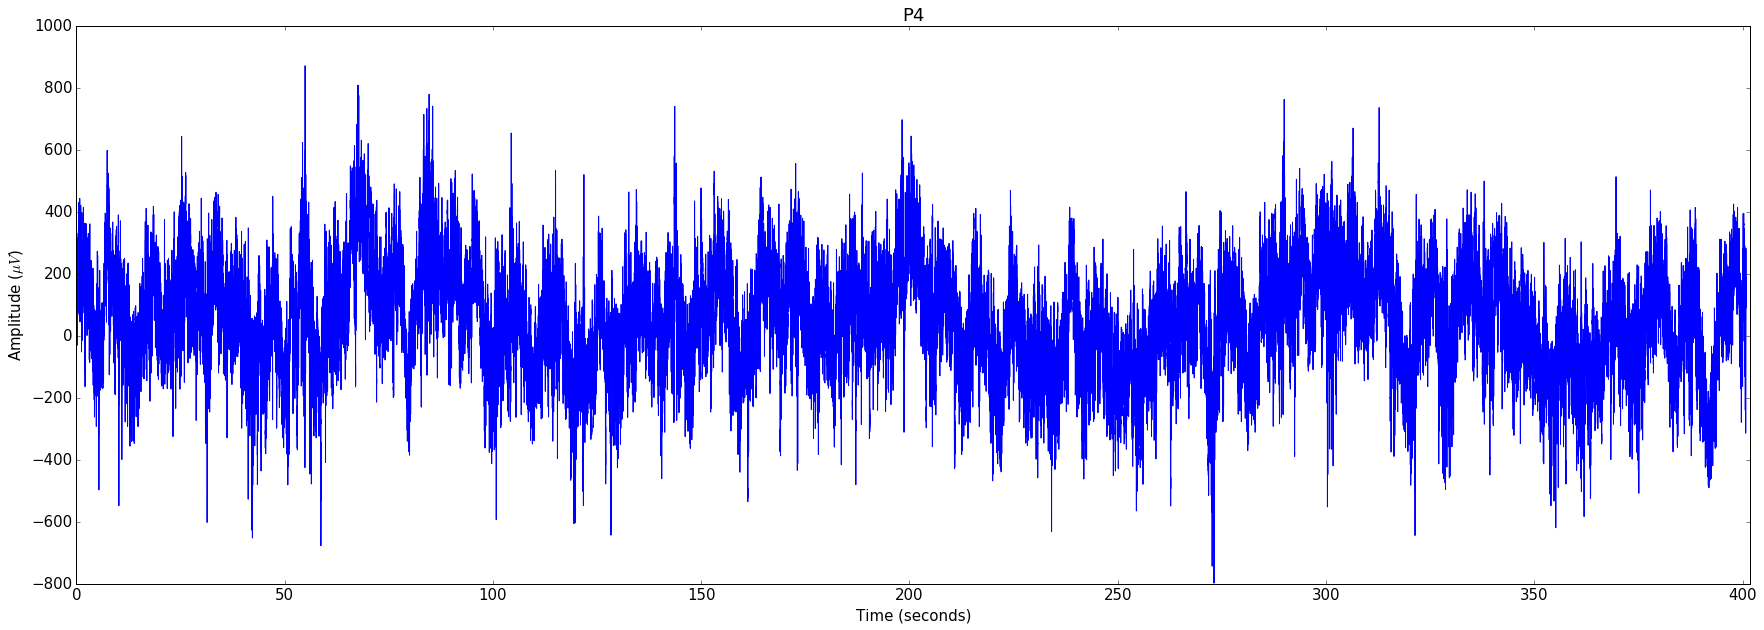

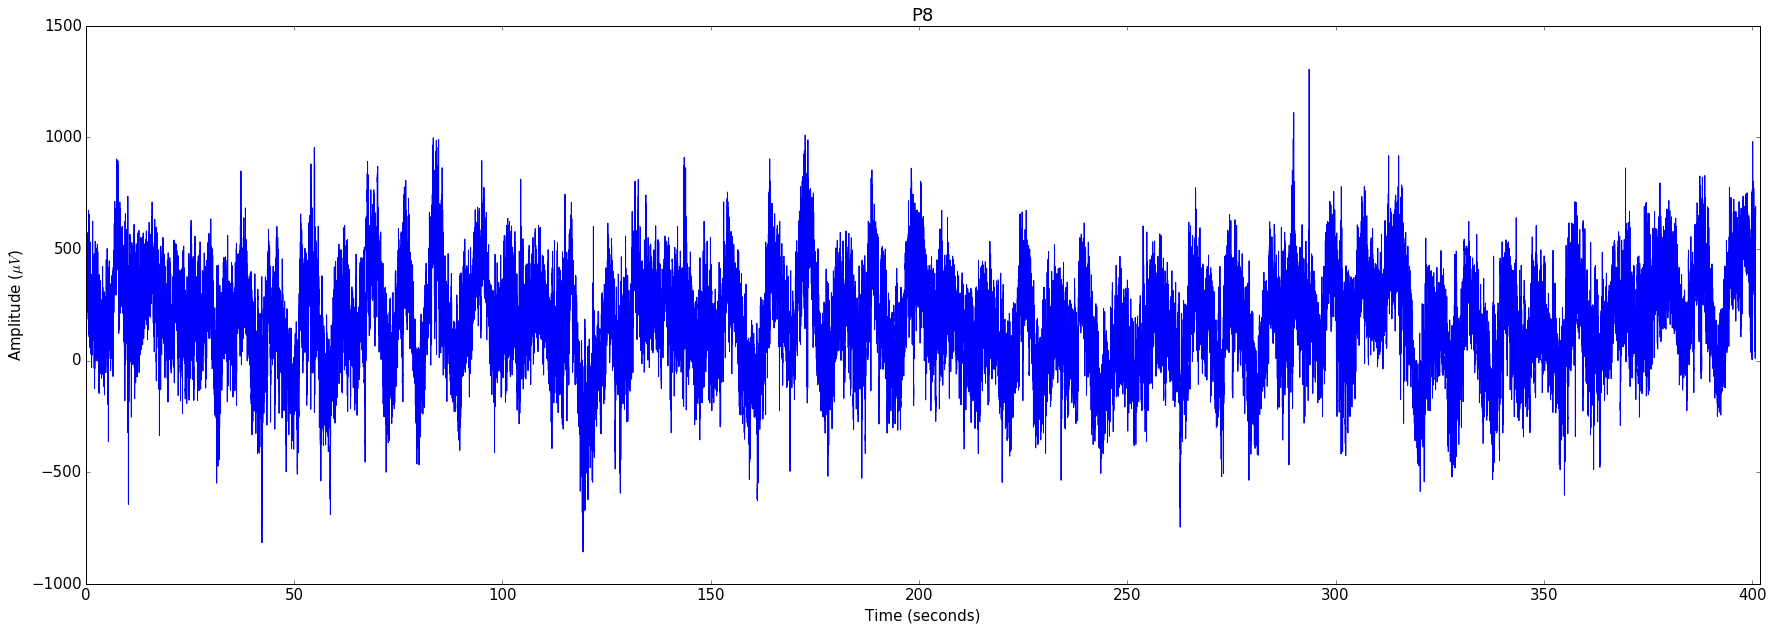

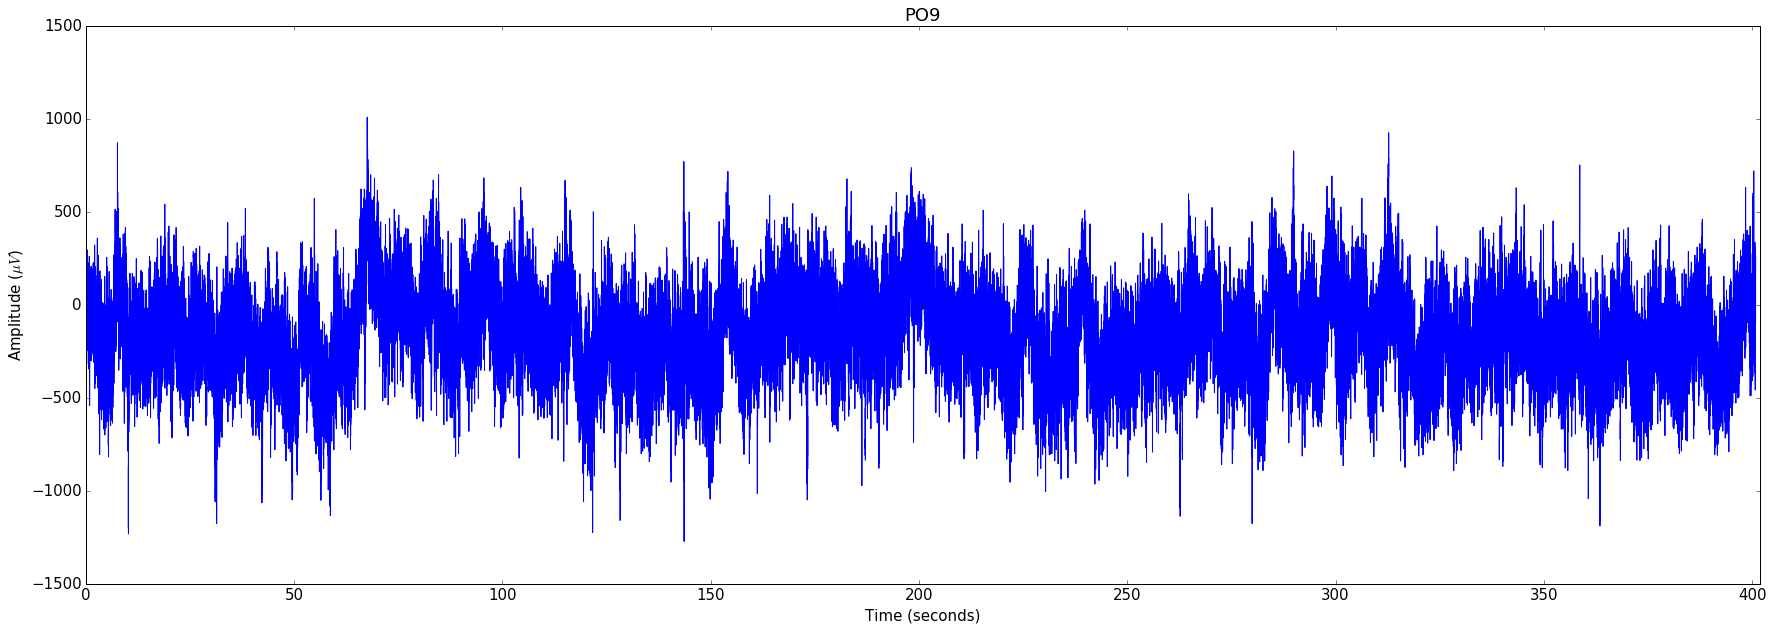

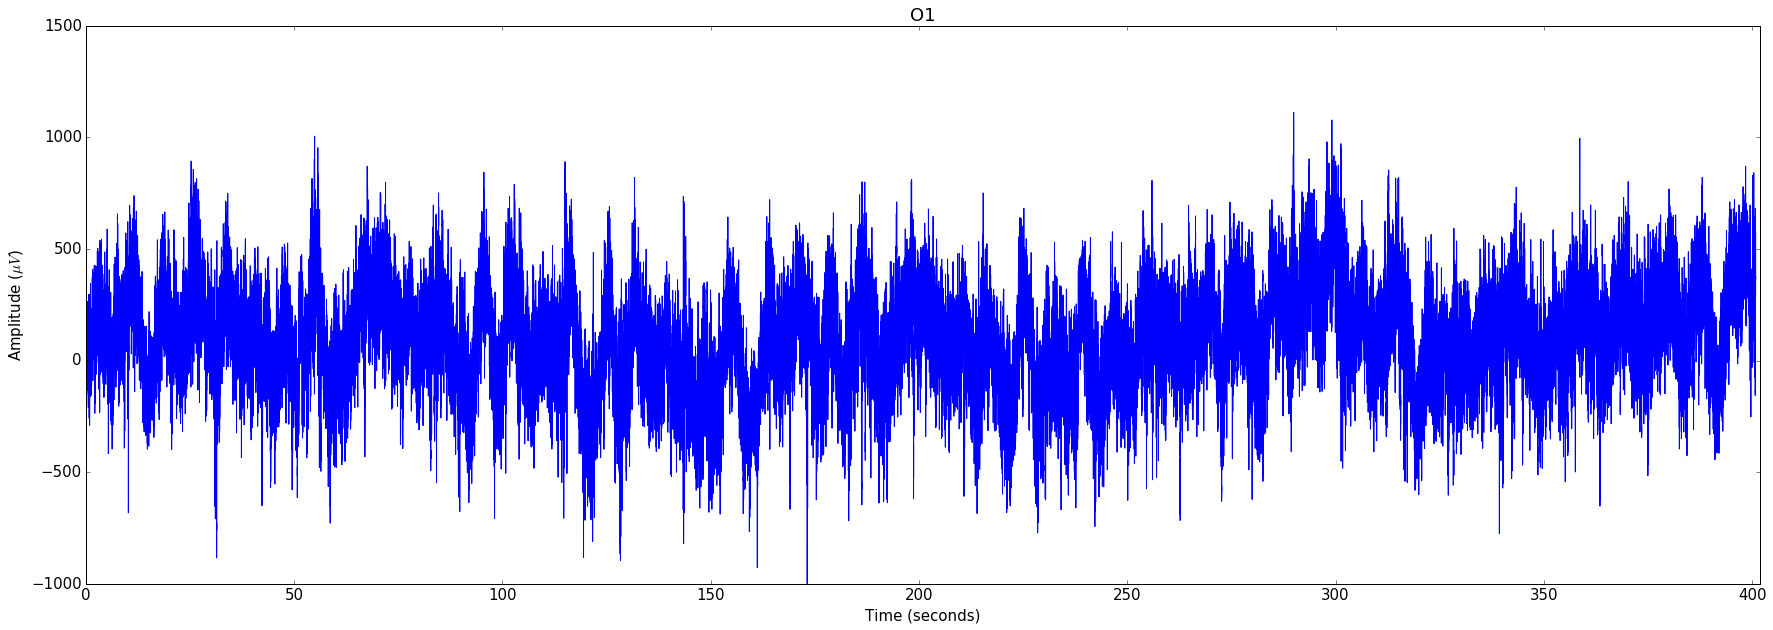

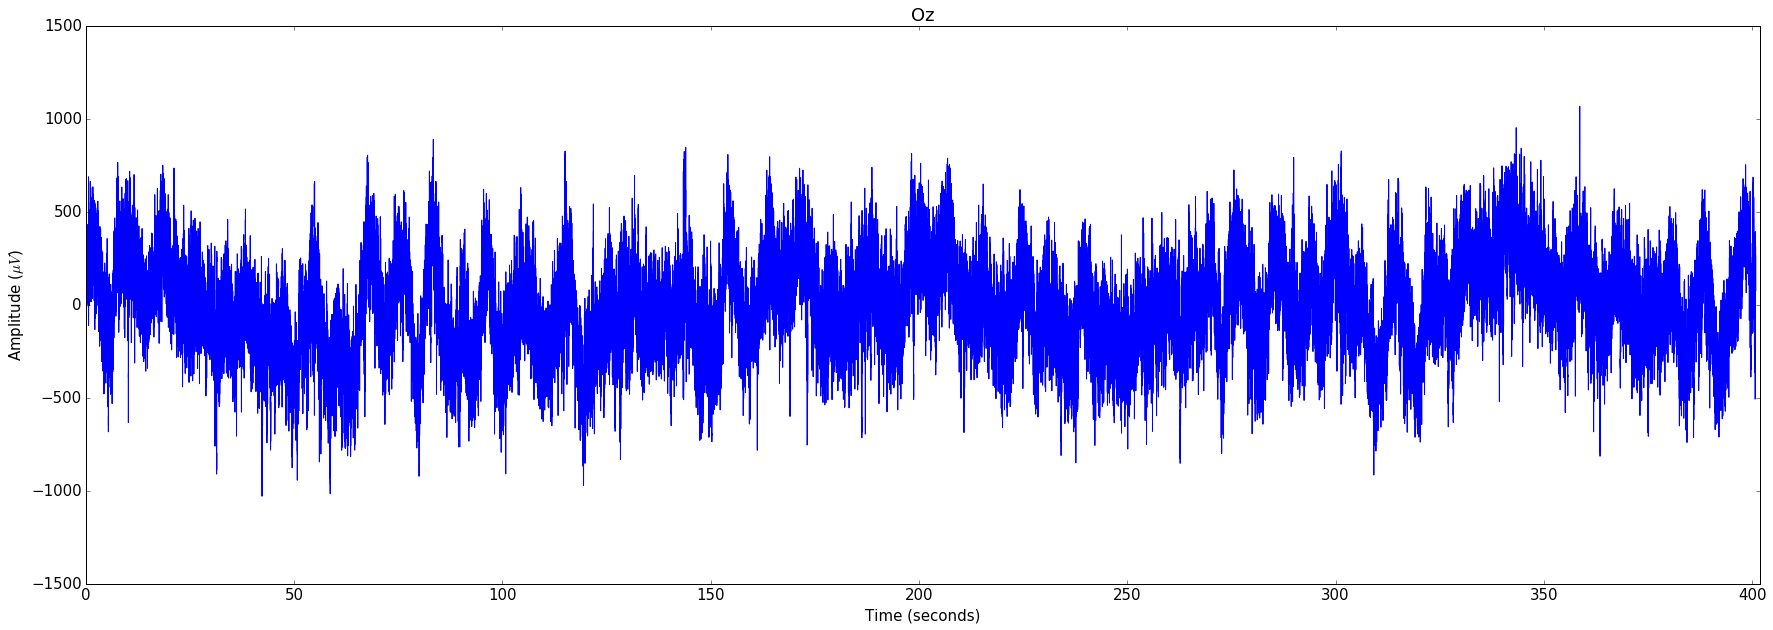

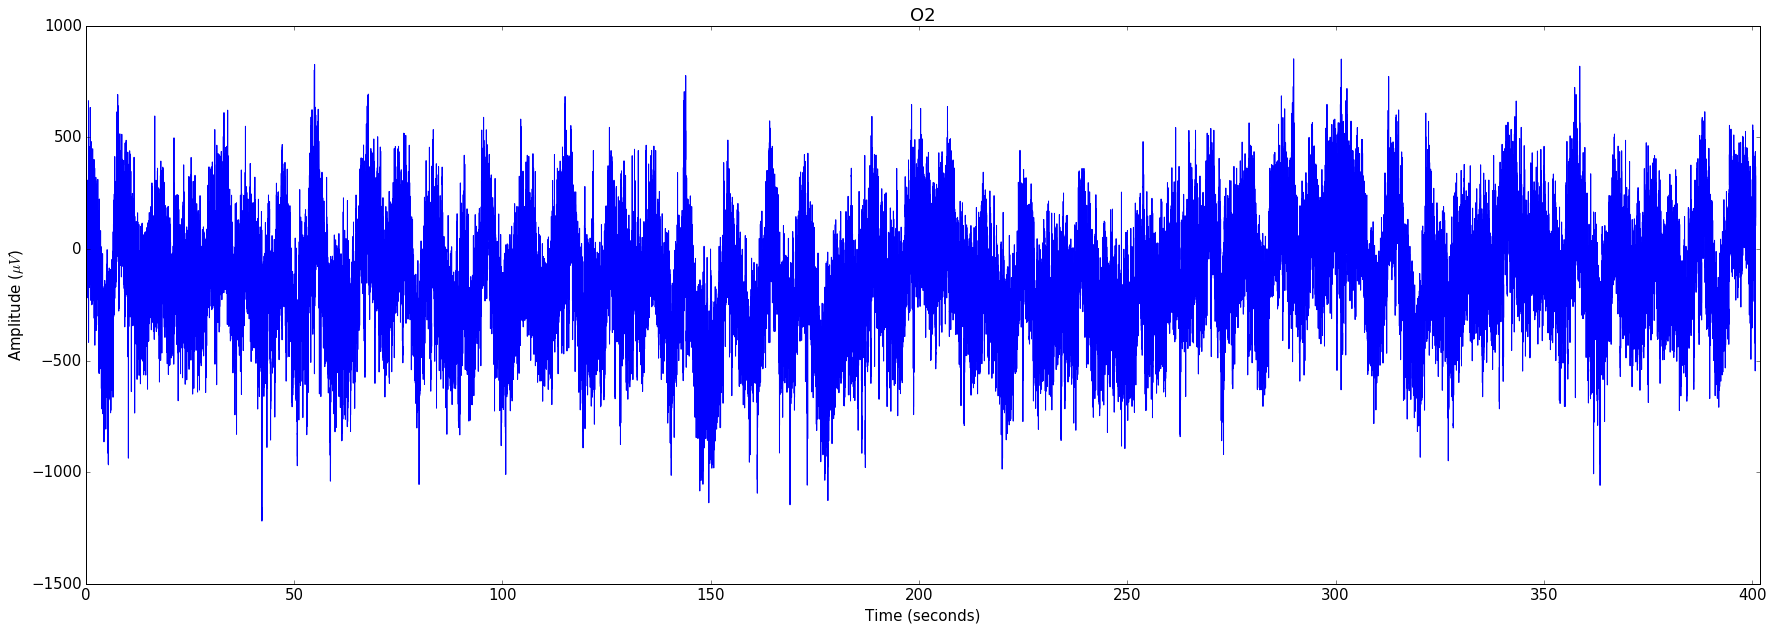

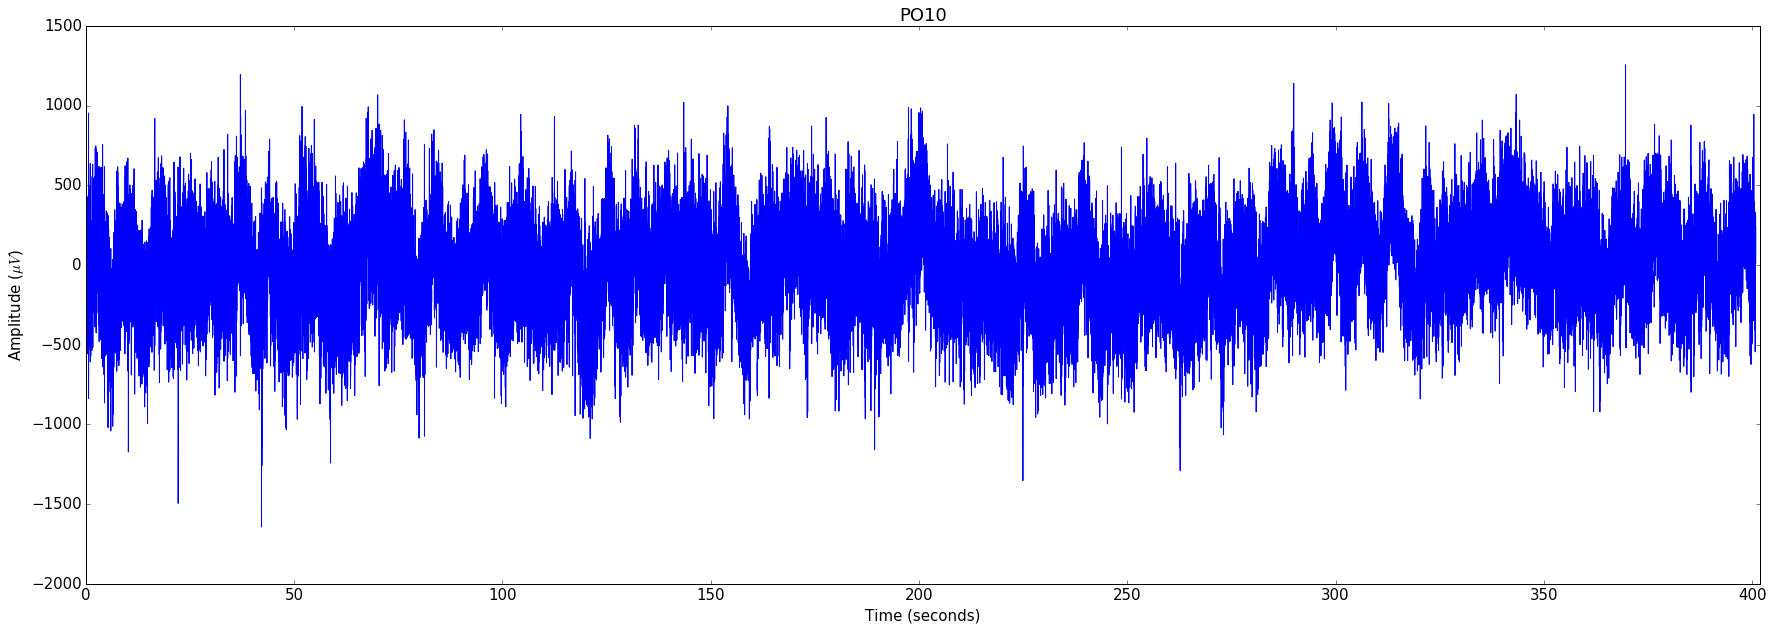

In [9]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


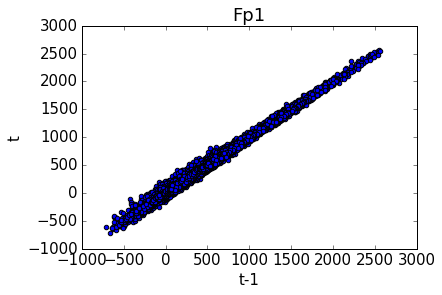

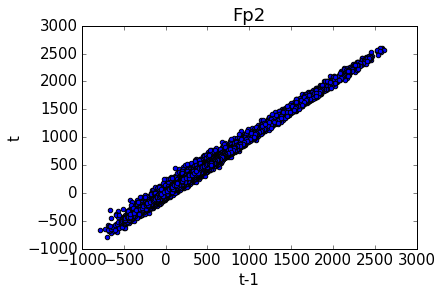

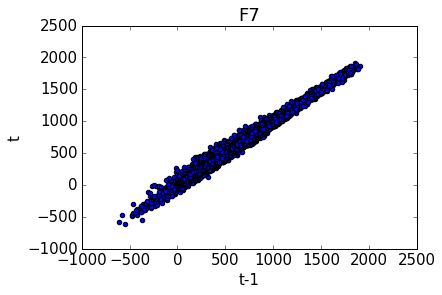

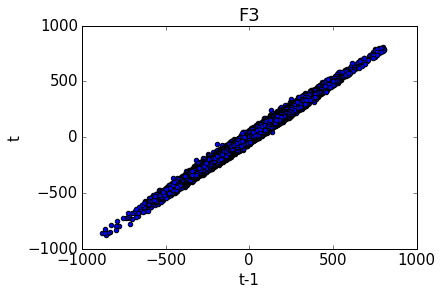

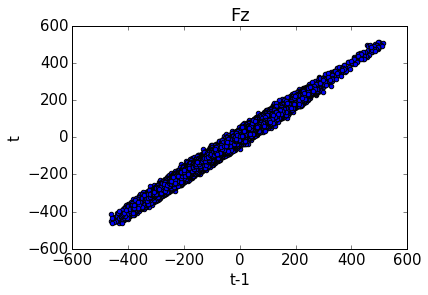

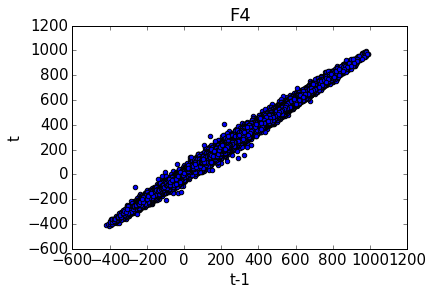

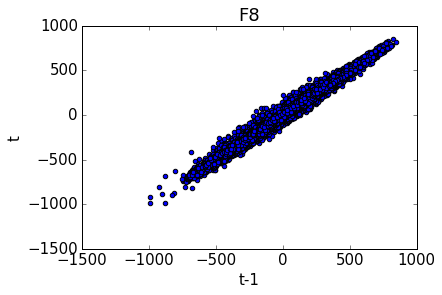

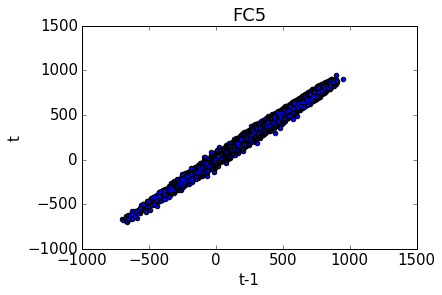

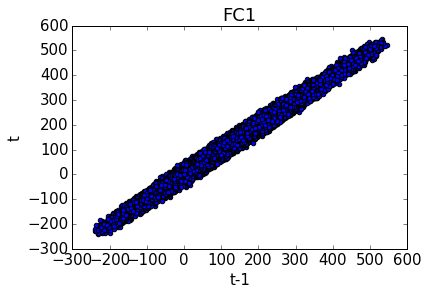

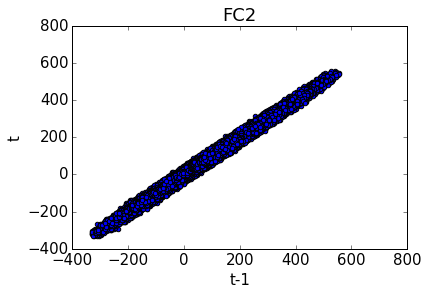

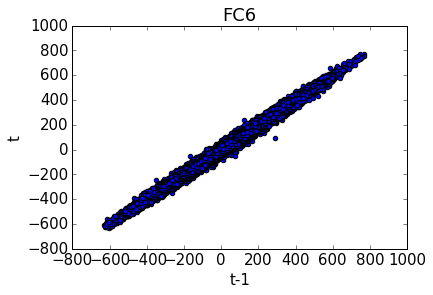

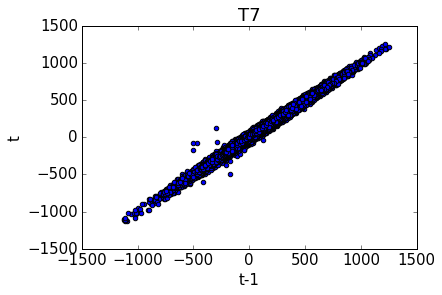

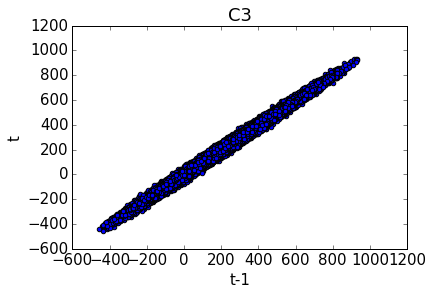

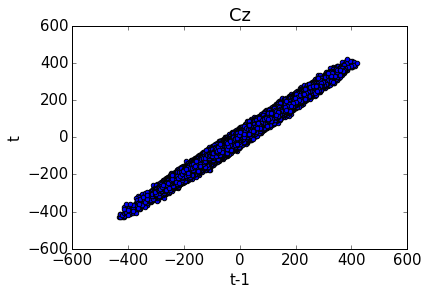

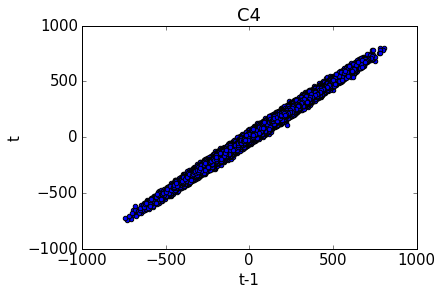

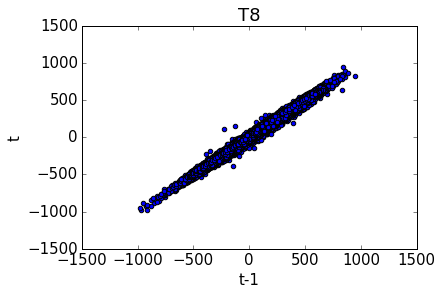

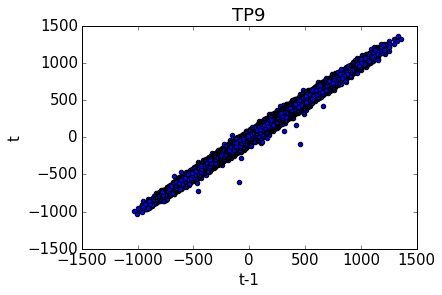

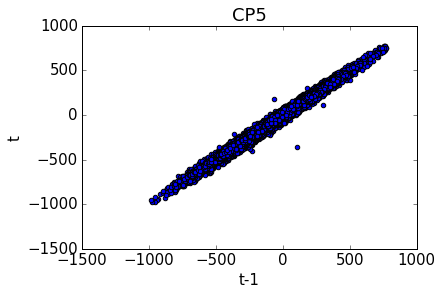

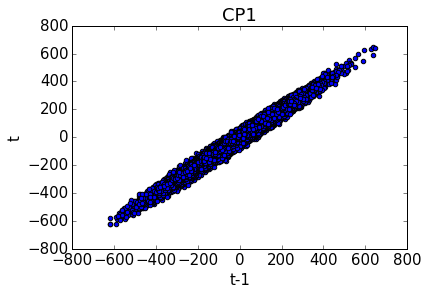

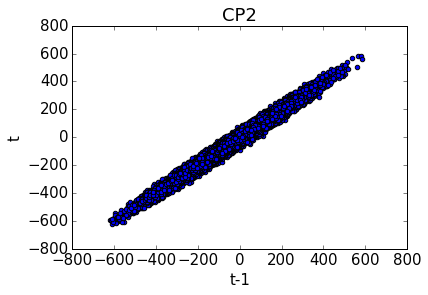

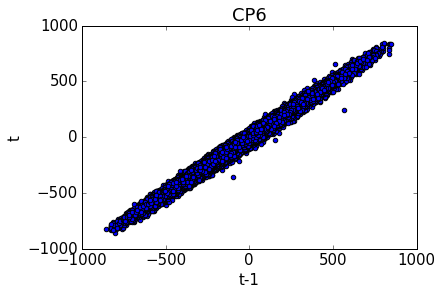

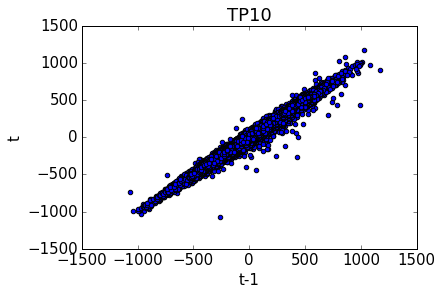

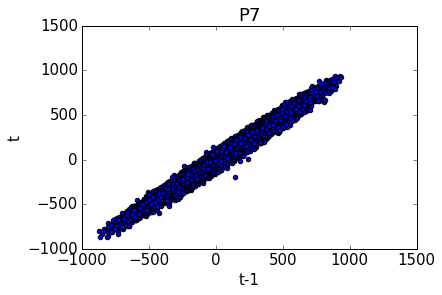

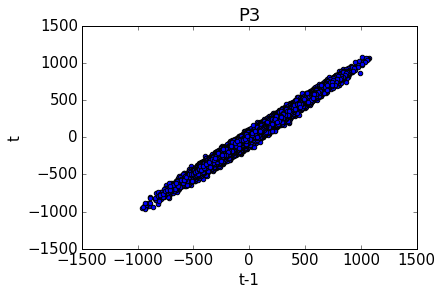

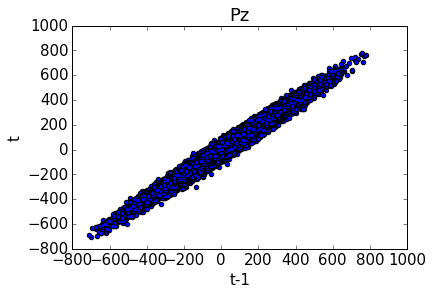

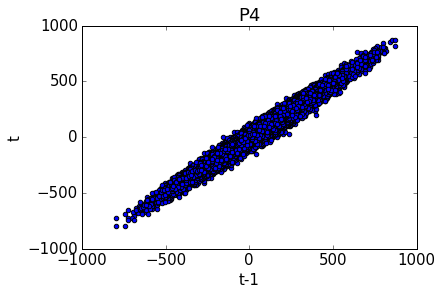

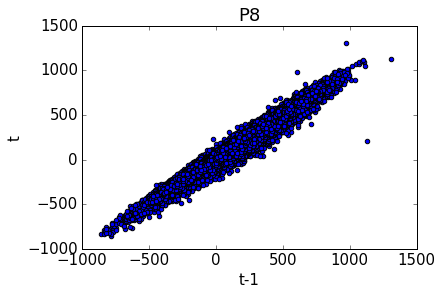

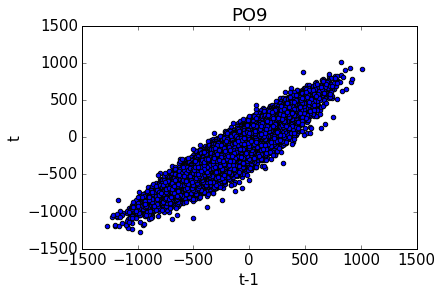

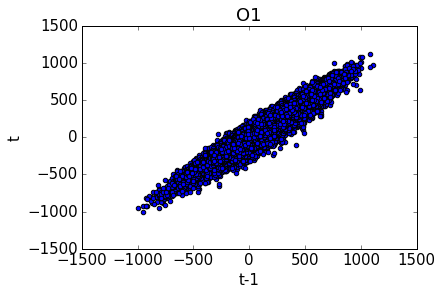

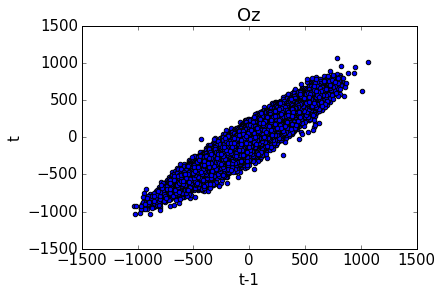

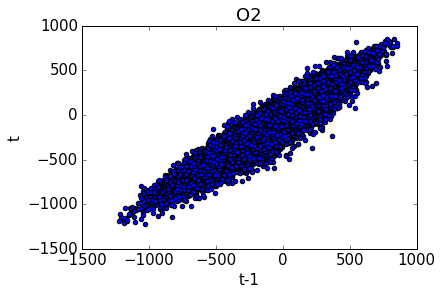

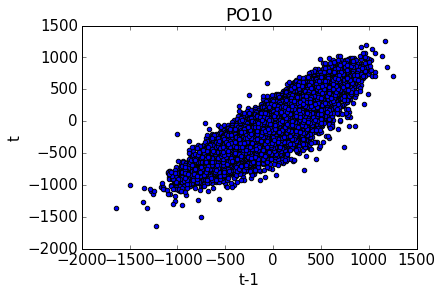

In [10]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [11]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.995551858241
0.996805927721
0.992981318981
0.995920177906
0.99411300647
0.996378037037
0.993653662499
0.996102294636
0.992927040081
0.995367161648
0.995284726971
0.995754776694
0.995232761134
0.992320334318
0.996101551777
0.995076606365
0.996172682642
0.993607489691
0.989700141579
0.991547014774
0.993800234746
0.991127343059
0.989616073593
0.990856340355
0.988714377487
0.984509347976
0.981532161249
0.933597880617
0.960546121019
0.956837195024
0.948591188846
0.889559828292


In [12]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.75617049  0.66466777  0.63973321  0.62309804  0.42041725
  0.5400245   0.36765715  0.43720157  0.30117119  0.45216164  0.29591252
  0.13703359  0.16634309  0.20440188  0.26947592  0.11359168  0.1875894
  0.09596493  0.13415932  0.14743051  0.15533714  0.15403647  0.08473255
  0.14348625  0.11925412  0.1448784   0.10248108  0.08398356  0.13005134
  0.08678139  0.08663483]
[ 0.75617049  1.          0.58058292  0.6140409   0.65538497  0.65985204
  0.62993105  0.35818375  0.41031905  0.377663    0.42244611  0.22221638
  0.15713212  0.18797485  0.23315952  0.37111565  0.12816871  0.13313417
  0.12150979  0.22622106  0.17509418  0.18874622  0.08270484  0.16244006
  0.10909133  0.15119961  0.14550726  0.10700781  0.13136195  0.08892565
  0.10523206  0.07843201]
[ 0.66466777  0.58058292  1.          0.62404417  0.57249357  0.35723401
  0.53458264  0.49014629  0.49306661  0.32337589  0.40519658  0.56120765
  0.33503474  0.33449433  0.32085792  0.40656384  0.35953959  0.38275915


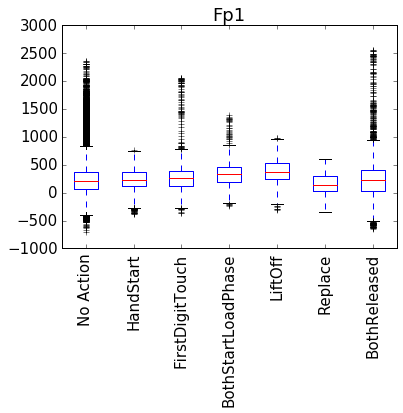

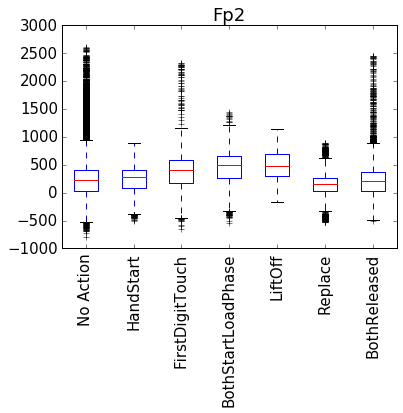

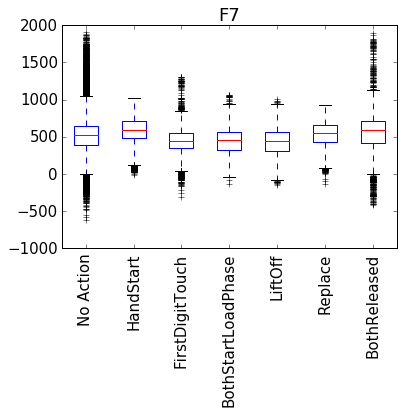

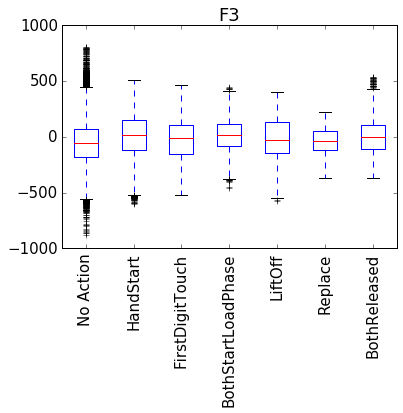

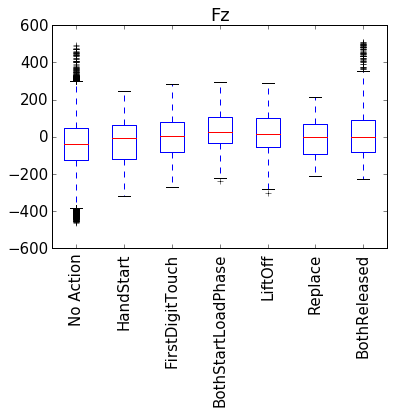

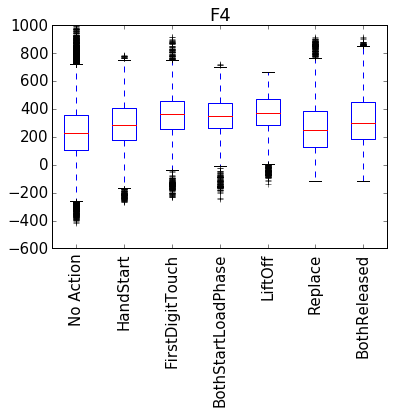

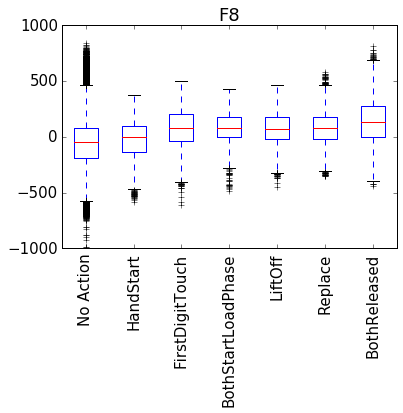

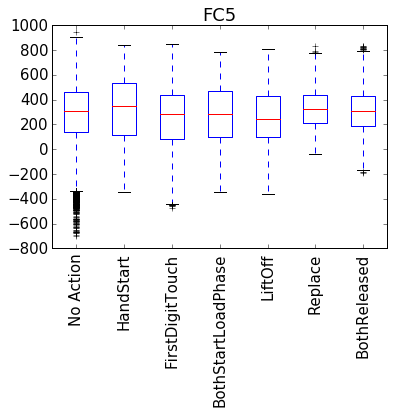

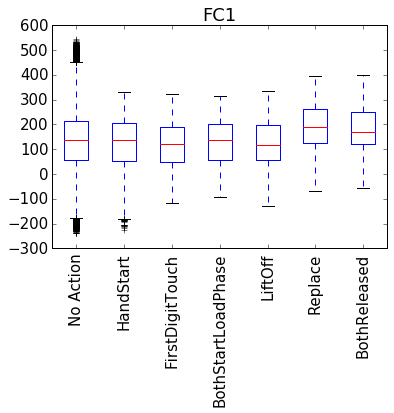

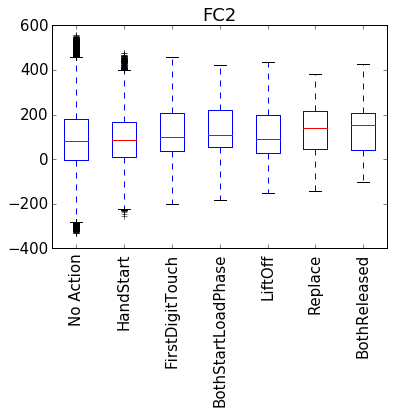

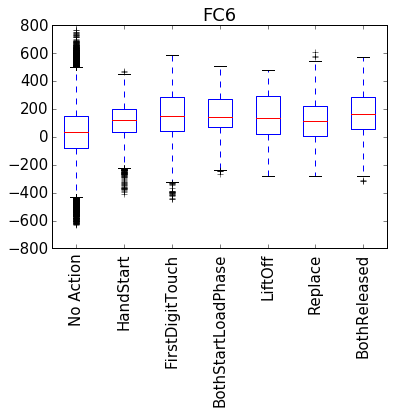

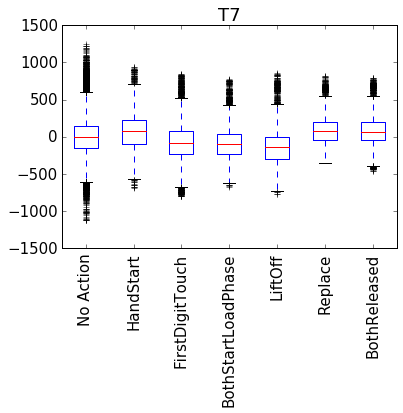

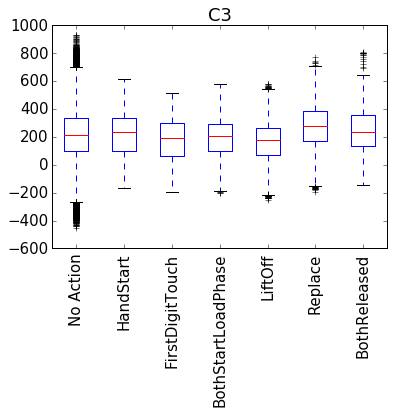

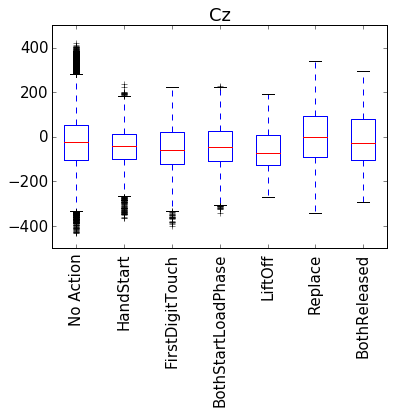

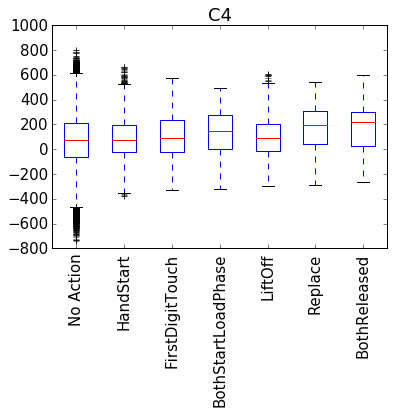

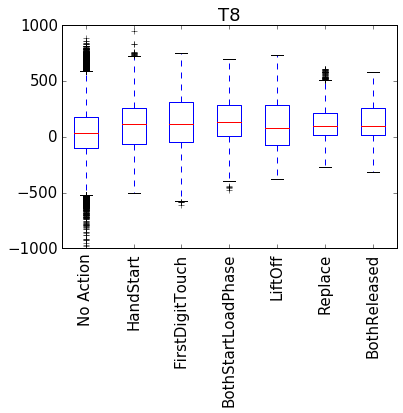

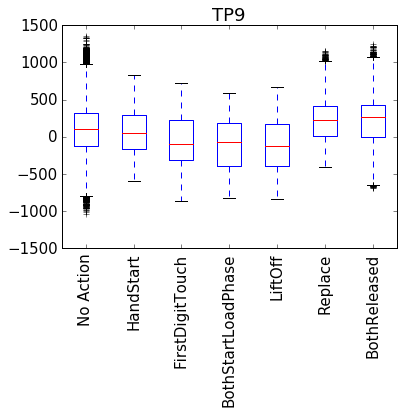

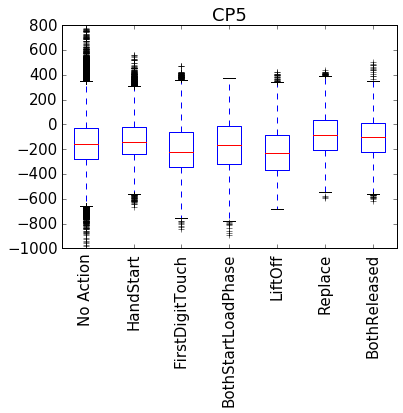

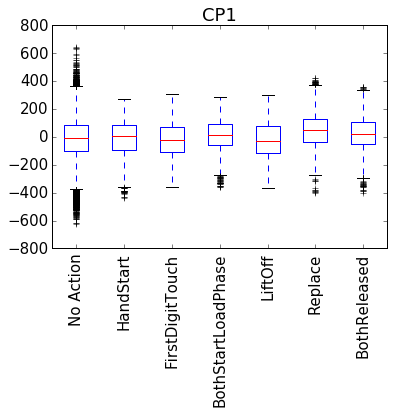

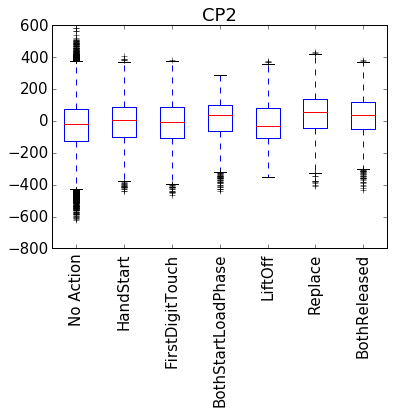

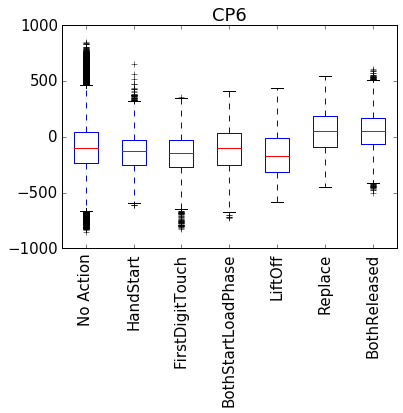

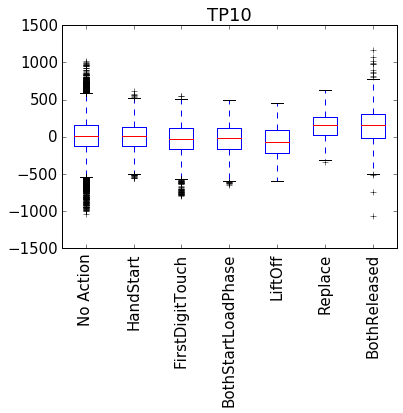

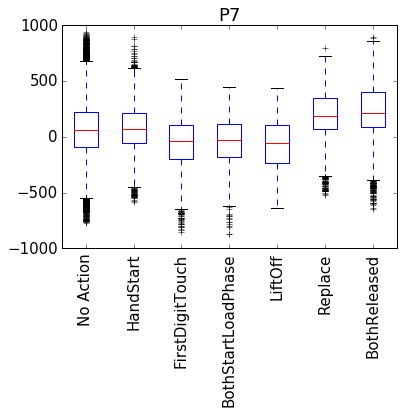

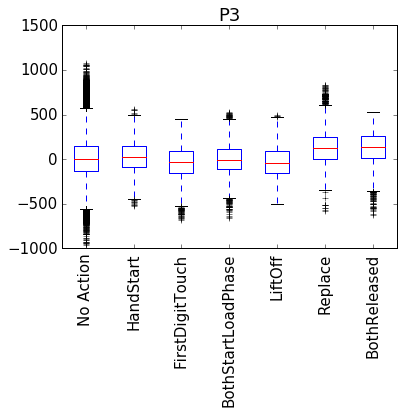

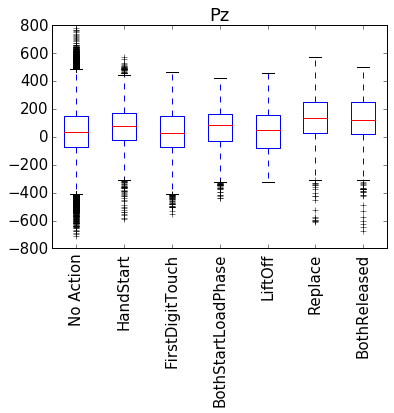

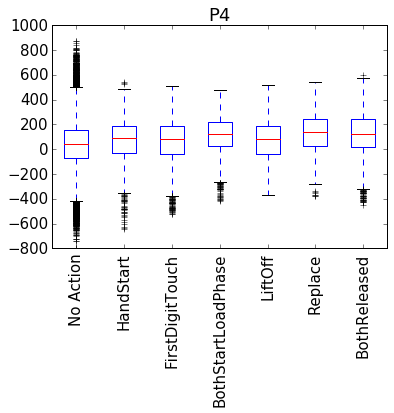

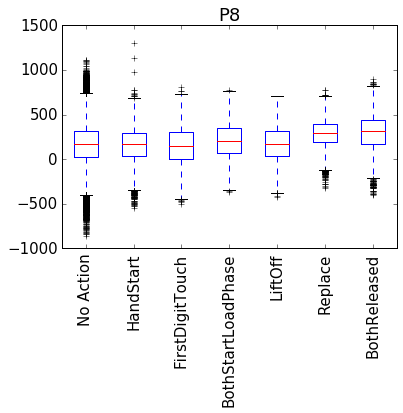

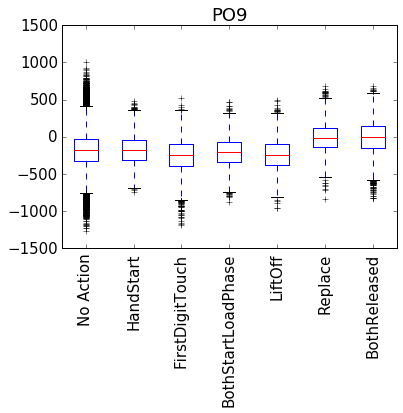

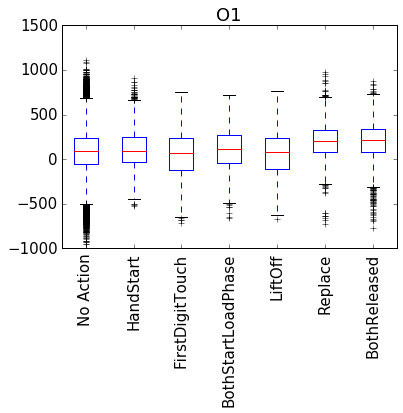

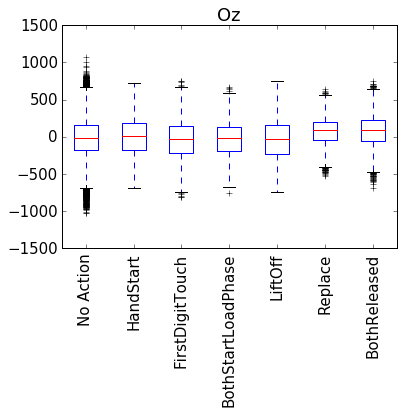

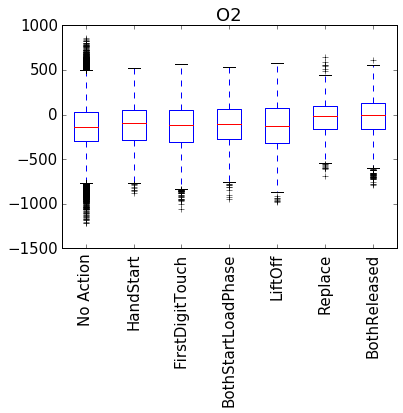

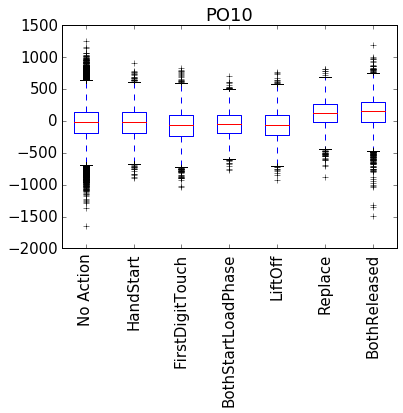

In [13]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [14]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.77296751e-01,   8.83274478e-03,   7.47388550e-05, ...,
          8.71129628e-04,   1.18400342e-02,   7.27875235e-04],
       [  9.82001821e-01,   8.97711343e-03,   1.05612923e-04, ...,
          8.14689690e-04,   7.33672342e-03,   4.69778839e-04],
       [  9.81927703e-01,   8.69834936e-03,   1.05221580e-04, ...,
          1.05355930e-03,   7.36673372e-03,   5.78837840e-04],
       ..., 
       [  9.54251243e-01,   1.29809639e-02,   1.13837728e-02, ...,
          2.17849609e-03,   7.18938667e-03,   4.86574860e-03],
       [  9.54592916e-01,   1.18641566e-02,   9.58724560e-03, ...,
          1.83466365e-03,   7.44814326e-03,   7.25118107e-03],
       [  9.60971601e-01,   1.04108428e-02,   6.81299469e-03, ...,
          1.29164970e-03,   8.57336444e-03,   7.31714579e-03]])

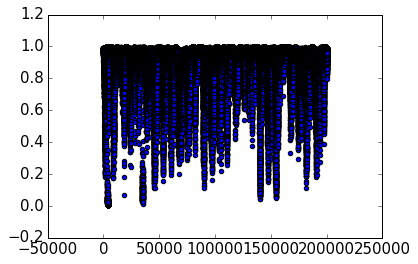

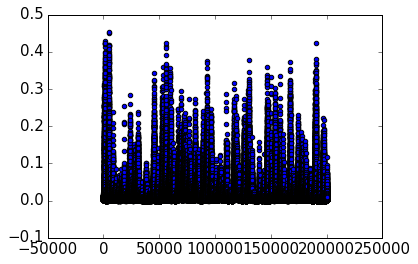

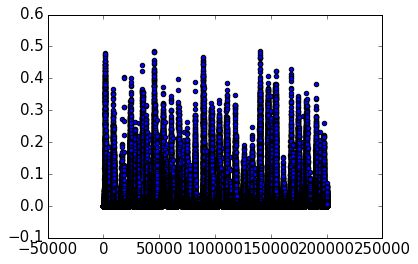

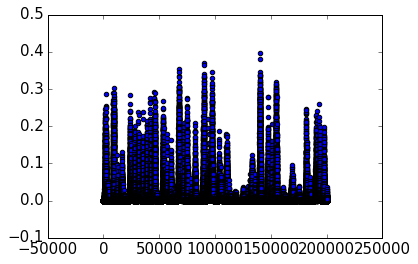

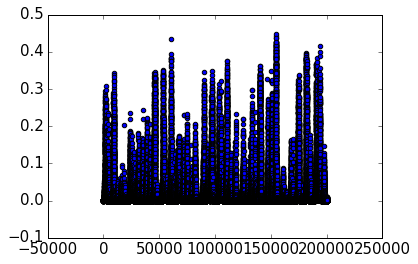

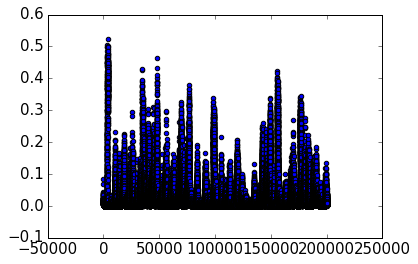

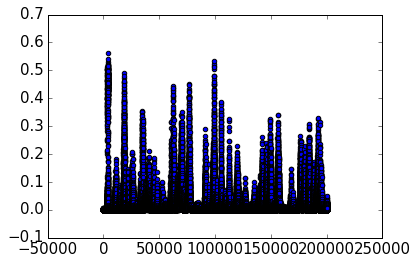

In [16]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [18]:
from sklearn.metrics import roc_auc_score 

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.845493089177
HandStart: 0.854855376829
FirstDigitTouch: 0.923964897848
BothStartLoadPhase: 0.94516468916
LiftOff: 0.953688671473
Replace: 0.899421651706
BothReleased: 0.911345984678


In [20]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

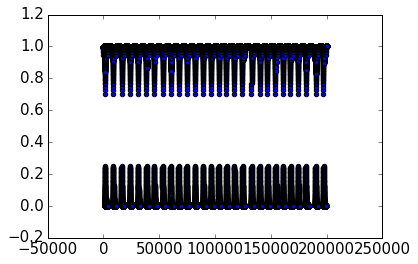

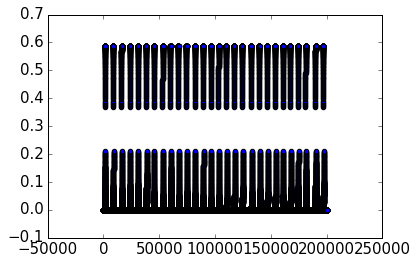

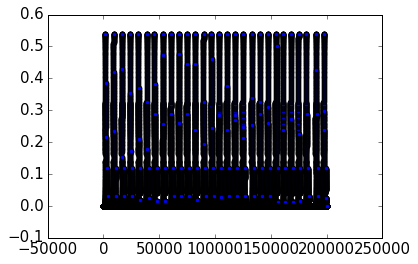

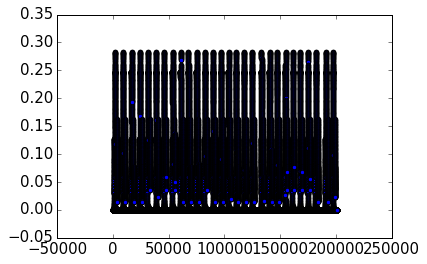

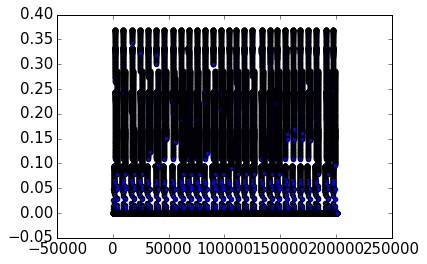

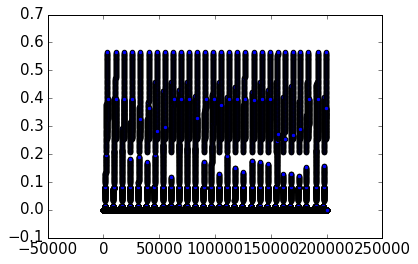

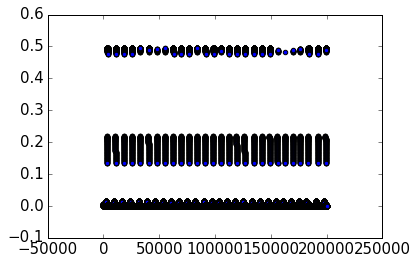

In [21]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [22]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.998802533986
HandStart: 0.996852423541
FirstDigitTouch: 0.99525975653
BothStartLoadPhase: 0.988780178651
LiftOff: 0.991503340195
Replace: 0.993562622093
BothReleased: 0.999541442987


In [23]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.999', '0.993', '0.832', '0.000', '0.532', '0.719', '0.991']
Recall: ['0.999', '0.993', '0.940', '0.000', '0.521', '0.973', '0.991']
F-1 Score: ['0.999', '0.993', '0.883', '0.000', '0.526', '0.827', '0.991']
